<a href="https://colab.research.google.com/github/Santiloza89/Aprendizaje-Automatico-2/blob/main/TP1_Aprendizaje_Automatico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico 1**





# **Aprendizaje Automático 2**

**Facultad de Ciencias Exactas, Ingeniería y Agrimensura - TUIA**

**Alumnos:**


*   Ferrero Santiago
*   Loza Santiago



----------------------------------------------------------------------------------------------------------------------------------------------------------------

Enunciado: https://docs.google.com/document/d/1cp8cZrxhCjM5nm4AM8k1arh-bpLtT1-3/edit?rtpof=true#heading=h.gjdgxs

## Preparación del entorno.

Instalar gdown

In [1]:

!pip install -q gdown


Descargar los datasets:

In [2]:
import gdown

# TP1-1-student_performance.zip
gdown.download('https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc')

# TP1-2-Dry-Bean-Dataset.zip
gdown.download('https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ')

# TP1-3-natural-scenes.zip
gdown.download('https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ')

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /content/TP1-1-student_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 52.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ
To: /content/TP1-2-Dry-Bean-Dataset.zip
100%|██████████| 1.33M/1.33M [00:00<00:00, 11.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=391959de-6574-4ef2-90ff-6f6ec5f37335
To: /content/TP1-3-natural-scenes.zip
100%|██████████| 363M/363M [00:09<00:00, 36.4MB/s]


'TP1-3-natural-scenes.zip'

Descomprimir datasets:

In [3]:
import zipfile

with zipfile.ZipFile('TP1-1-student_performance.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-1')

with zipfile.ZipFile('TP1-2-Dry-Bean-Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-2')

with zipfile.ZipFile('TP1-3-natural-scenes.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-3')

Importamos las librerias necesarias

In [4]:
import numpy as np
from pathlib import Path
import tensorflow as tf
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.layers import Input, RandomFlip, RandomContrast, BatchNormalization, RandomTranslation, Flatten, Dropout, Add
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Rescaling
from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomTranslation, RandomContrast

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,mean_absolute_percentage_error

In [5]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Problema 1



En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.


In [ ]:
# Cargamos el dataset Student_Performance
Student_Perf = pd.read_csv("TP1-1/Student_Performance.csv")

In [ ]:
Student_Perf.head(20)

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7               99                        Yes            9   
1               4               82                         No            4   
2               8               51                        Yes            7   
3               5               52                        Yes            5   
4               7               75                         No            8   
5               3               78                         No            9   
6               7               73                        Yes            5   
7               8               45                        Yes            4   
8               5               77                         No            8   
9               4               89                         No            4   
10              8               91                         No            4   
11              8               79                         No            6   
12              3               47                         No            9   
13              6               47                         No            4   
14              5               79                         No            7   
15              2               72                         No            4   
16              8               73                        Yes            8   
17              6               83                        Yes            7   
18              2               54                        Yes            4   
19              5               75                         No            7   

    Sample Question Papers Practiced  Performance Index  
0                                  1               91.0  
1                                  2               65.0  
2                                  2               45.0  
3                                  2               36.0  
4                                  5               66.0  
5                                  6               61.0  
6                                  6               63.0  
7                                  6               42.0  
8                                  2               61.0  
9                                  0               69.0  
10                                 5               84.0  
11                                 2               73.0  
12                                 2               27.0  
13                                 2               33.0  
14                                 8               68.0  
15                                 3               43.0  
16                                 4               67.0  
17                                 2               70.0  
18                                 9               30.0  
19                                 0               63.0

In [ ]:
Student_Perf.shape

(10000, 6)

In [ ]:
Student_Perf.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

**Variables:**

*   `Hours Studied`: El número total de horas dedicadas al estudio por cada estudiante.
*   `Previous Scores`: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
*   `Extracurricular Activities`: Si el estudiante participa en actividades extracurriculares (Sí o No).
*   `Sleep Hours`: El número promedio de horas de sueño que el estudiante tuvo por día.
*   `Sample Question Papers Practiced`: El número de cuestionarios de muestra que el estudiante practicó.

**Variable Objetivo:**

*   `Performance Index`: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.


### **Analisis exploratorio**

En primer lugar, dividiremos nuestro set de datos en Train (80%) y Test (20%).

In [ ]:
#Seleccionamos nuestras variables
X = Student_Perf[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = Student_Perf['Performance Index'] # Variable a predecir

In [ ]:
# Dividimos los datos en conjunto de entrenamiento (80%) y conjunto de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [ ]:
#Obtenemos el df de entrenamiento completo
Student_Perf_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
#Funcion que toma un df y devuelve los datos estadisticos de sus columnas
def datos_estadisticos(df):
  cols = df.columns
  for col in cols:
      print("--------------------")
      print("Columna: ", col)
      print("Cantidad de valores nulos: ", df[col].isnull().sum())
      print("Cantidad de valores únicos: ", df[col].nunique())
      print("Tipo de dato: ", df[col].dtype)
      # Si no es numérica, continuar con la siguiente columna
      if df[col].dtype == "object":
          print("--------------------")
          continue
      # Si es una columna categórica, mostrar la cantidad de veces que aparece cada valor
      if df[col].nunique() < 11:
          print("Valores únicos: ", df[col].unique())
          print("Cantidad de veces que aparece cada valor: ", df[col].value_counts())
      else:
          # Si es una columna numérica, mostramos media, desvío estándar, mínimo, máximo...
          print("Media: ", df[col].mean())
          print("Desvío estándar: ", df[col].std())
          print("Mínimo: ", df[col].min())
          print("Máximo: ", df[col].max())
      print("--------------------")


In [ ]:
datos_estadisticos(Student_Perf_train)

--------------------
Columna:  Hours Studied
Cantidad de valores nulos:  0
Cantidad de valores únicos:  9
Tipo de dato:  int64
Valores únicos:  [7 6 4 9 3 5 2 1 8]
Cantidad de veces que aparece cada valor:  Hours Studied
1    943
6    917
7    901
3    900
9    897
5    877
2    859
8    859
4    847
Name: count, dtype: int64
--------------------
--------------------
Columna:  Previous Scores
Cantidad de valores nulos:  0
Cantidad de valores únicos:  60
Tipo de dato:  int64
Media:  69.44175
Desvío estándar:  17.390871520399138
Mínimo:  40
Máximo:  99
--------------------
--------------------
Columna:  Extracurricular Activities
Cantidad de valores nulos:  0
Cantidad de valores únicos:  2
Tipo de dato:  object
--------------------
--------------------
Columna:  Sleep Hours
Cantidad de valores nulos:  0
Cantidad de valores únicos:  6
Tipo de dato:  int64
Valores únicos:  [7 4 8 9 6 5]
Cantidad de veces que aparece cada valor:  Sleep Hours
8    1449
7    1357
6    1335
5    1310
4    1281

In [ ]:
# Estadisticas
Student_Perf_train.describe()

Hours Studied  Previous Scores  Sleep Hours  \
count    8000.000000      8000.000000  8000.000000   
mean        4.986000        69.441750     6.523375   
std         2.595071        17.390872     1.688582   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                       8000.000000        8000.000000  
mean                           4.588500          55.195250  
std                            2.865256          19.260802  
min                            0.000000          11.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max                            9.000000         100.000000

Como todas las columnas tienen 8000 registros vemos que no hay nulos, y además, podemos notar que los datos de las columnas coinciden con lo que representan. En base a ello, en principio, podriamos descartar valores atípicos.

In [ ]:
# Chequemos si hay registros con valores nulos
Student_Perf_train.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
# Chequemos si hay registros duplicados
Student_Perf_train.duplicated().sum()

85

In [ ]:
Student_Perf_train[Student_Perf_train.duplicated() == True]

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
9074              9               78                        Yes            6   
5822              5               92                        Yes            8   
8193              5               42                        Yes            5   
7918              3               97                        Yes            4   
5739              5               48                         No            6   
...             ...              ...                        ...          ...   
9379              9               87                         No            7   
5667              9               49                         No            5   
1601              5               99                         No            7   
1019              7               61                        Yes            6   
2083              4               84                        Yes            9   

      Sample Question Papers Practiced  Performance Index  
9074                                 0               73.0  
5822                                 0               79.0  
8193                                 1               27.0  
7918                                 2               77.0  
5739                                 4               33.0  
...                                ...                ...  
9379                                 9               86.0  
5667                                 0               46.0  
1601                                 5               89.0  
1019                                 8               54.0  
2083                                 2               67.0  

[85 rows x 6 columns]

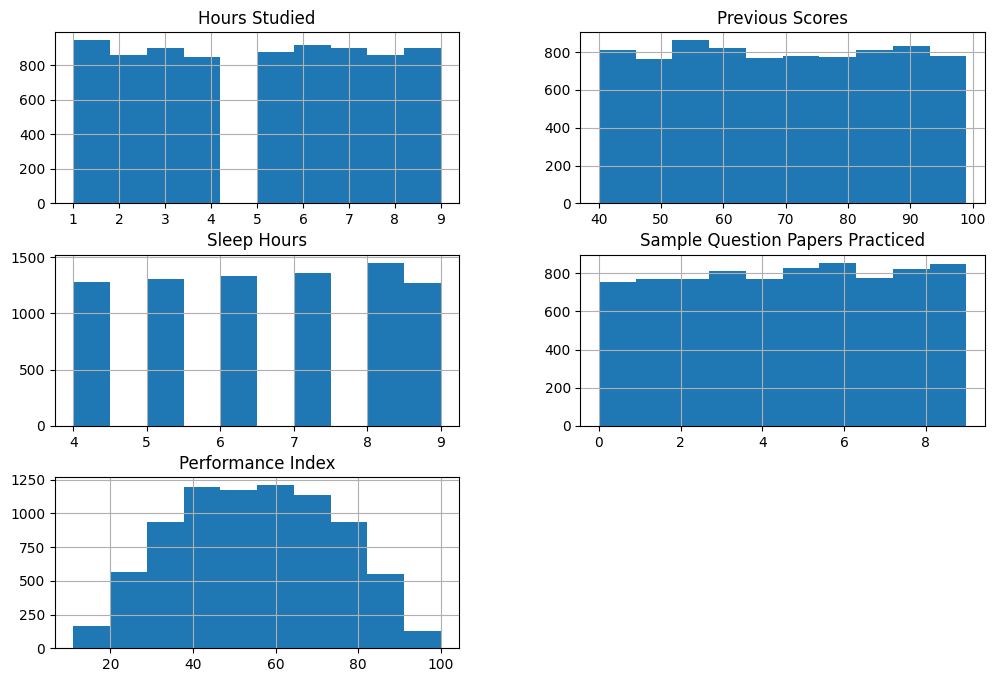

In [ ]:
# Visualizamos los histogramas de las variables
Student_Perf_train.hist(figsize=(12, 8))
plt.show()

In [ ]:
#La funcion toma una DF y columnas del mismo. Se encarga de generar boxplots de dichas columnas
def plot_boxplots(df, columns):
    # Creamos una figura de boxplots
    fig, axes = plt.subplots(1, len(columns), figsize=(12, 6))

    for i, column in enumerate(columns):
        # Generamos el gráfico de caja para la columna actual
        axes[i].boxplot(df[column])
        axes[i].set_title(column)
        axes[i].set_xticks([1])
        axes[i].set_xticklabels([column])

    plt.show()

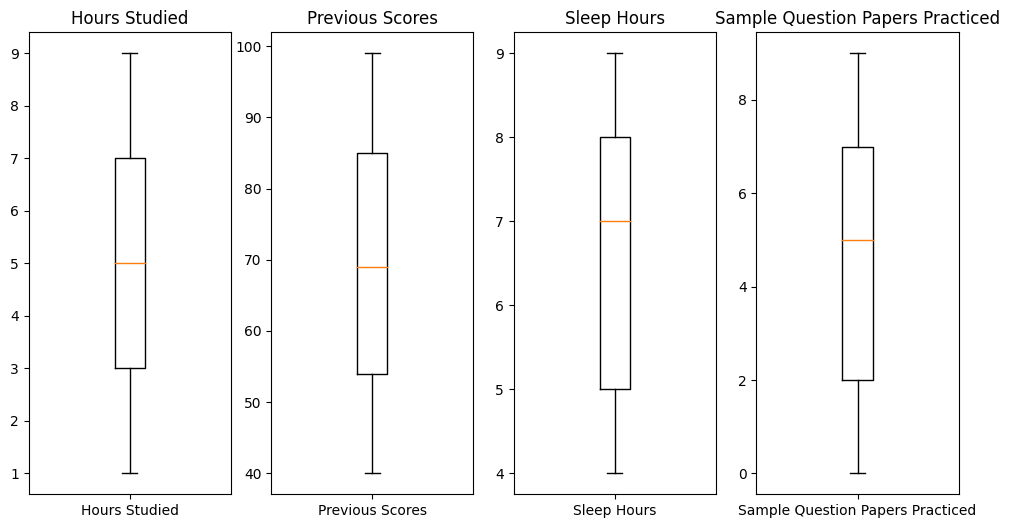

In [ ]:
# Boxplots columnas 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'
plot_boxplots(Student_Perf_train, ['Hours Studied', 'Previous Scores', 'Sleep Hours','Sample Question Papers Practiced'])

Los gráficos muestran la distribución de cuatro variables relacionadas con el rendimiento académico: `horas de estudio`,` puntajes previos`, `horas de sueño` y `cantidad de exámenes de práctica resueltos`.

*   `Horas de estudio y puntajes previos`: Ambas variables presentan un rango similar y una distribución bastante uniforme.

*   `Horas de sueño`: La mayoría de los estudiantes duermen entre 7 y 8 horas, con algunos valores inusuales por encima y por debajo de este rango.

*  `Exámenes de práctica`: Similar a las horas de sueño, la mayoría de los estudiantes resolvieron entre 2 y 8 exámenes de práctica, con algunos valores inusuales por encima y por debajo.





In [ ]:
# Relación entre 'Hours Studied' y 'Performance Index'
Student_Perf_train.groupby('Hours Studied')['Performance Index'].mean()

Hours Studied
1    44.329799
2    46.131548
3    49.901111
4    52.512397
5    55.549601
6    58.474373
7    60.330744
8    63.820722
9    66.025641
Name: Performance Index, dtype: float64

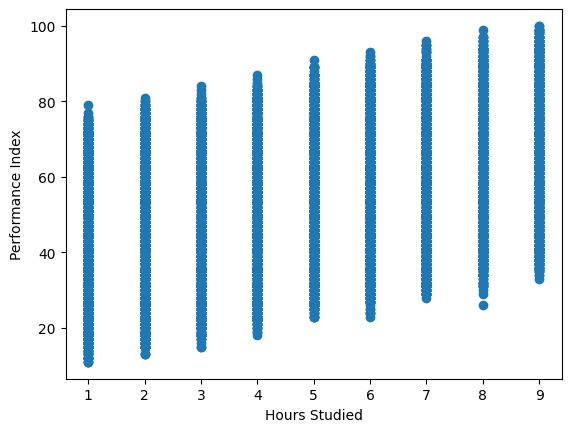

In [ ]:
# Gráfico de relación entre 'Hours Studied' y 'Performance Index'
plt.scatter(Student_Perf_train['Hours Studied'], Student_Perf_train['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

Podemos notar que a medida que aumentan las horas de sueño, no necesariamente el performance index mejora.

In [ ]:
# Filtramos solo las columnas numéricas
numeric_cols = Student_Perf_train.select_dtypes(include='number')

# Calculamos la matriz de correlación para las variables numéricas
numeric_cols.corr()

Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.006585     0.002807   
Previous Scores                       -0.006585         1.000000     0.005327   
Sleep Hours                            0.002807         0.005327     1.000000   
Sample Question Papers Practiced       0.006281         0.005654     0.007186   
Performance Index                      0.377935         0.915752     0.047984   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.006281   
Previous Scores                                           0.005654   
Sleep Hours                                               0.007186   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.036708   

                                  Performance Index  
Hours Studied                              0.377935  
Previous Scores                            0.915752  
Sleep Hours                                0.047984  
Sample Question Papers Practiced           0.036708  
Performance Index                          1.000000

In [ ]:
#Funcion que toma un df y devuelve la matriz de correlación de las variables
def corr(df):
    #Graficamos la matriz
    corr = df.corr()
    plt.figure(figsize=(15, 15))
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot = True,
        annot_kws = {'size': 6}
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    plt.show()

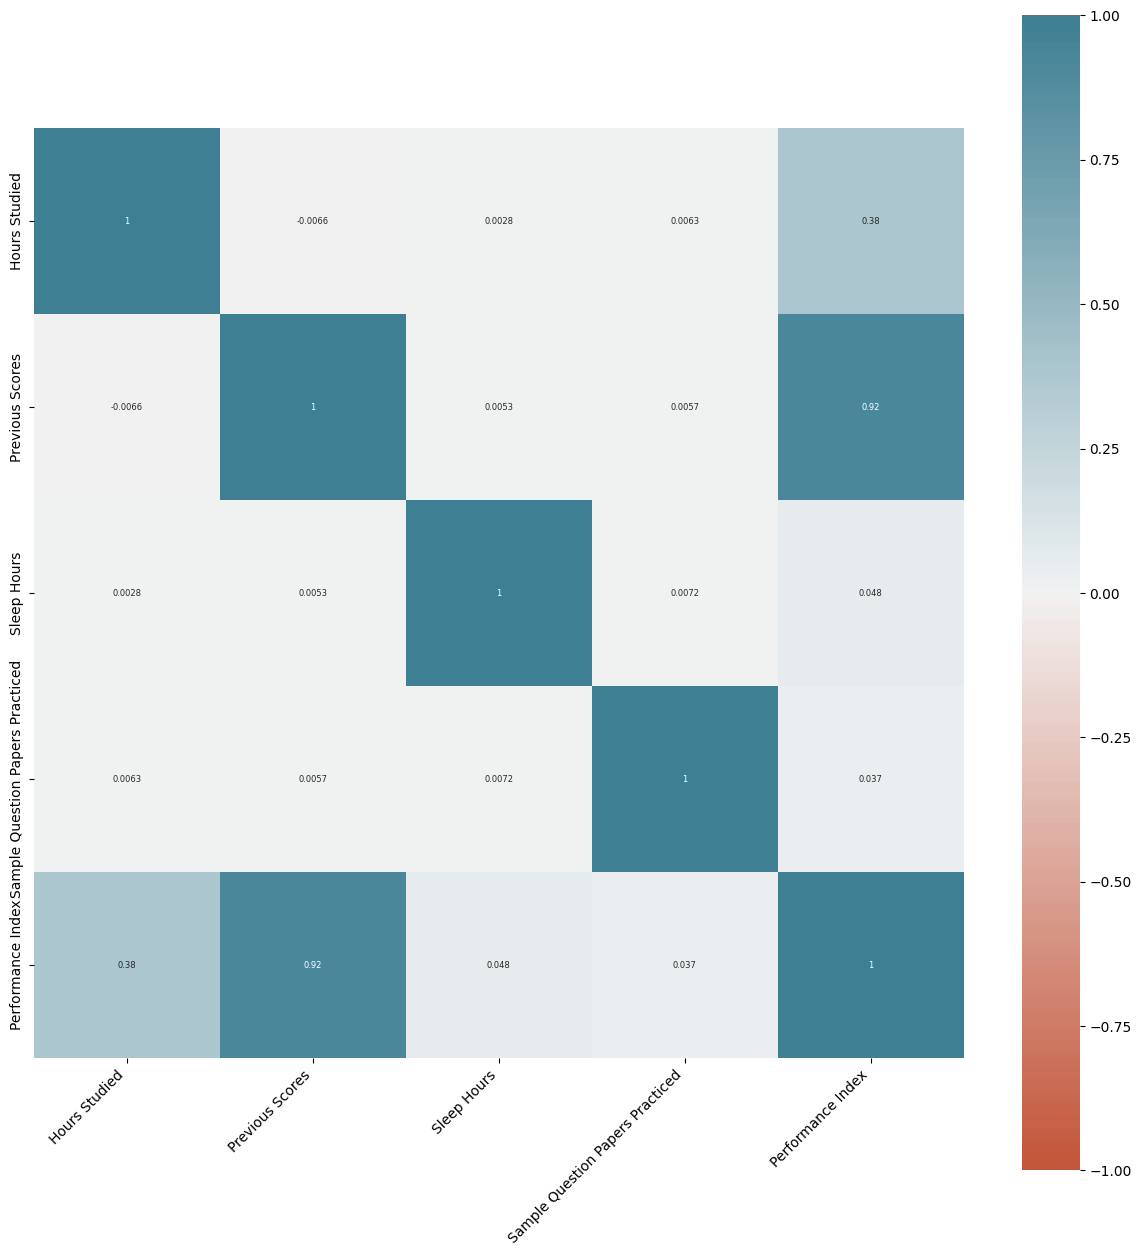

In [ ]:
corr(numeric_cols)

Analizando los distintos niveles de correlación que hay entre las variables, podemos notar que el mas elevado se da entre `Previous Scores` y `Performance Index`

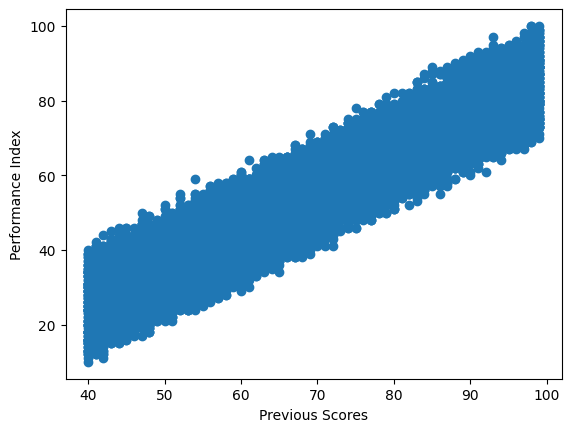

In [ ]:
# Gráfico de relación entre 'Previous Scores' y 'Performance Index'
plt.scatter(Student_Perf_train['Previous Scores'], Student_Perf_train['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

Se puede observar la clara relación entre las mismas.

### **Preprocesamiento**

In [ ]:
#Funcion de preprocesamiento de los datos
def preprocess_data(x, y , variable_objetive):

    # Diccionario para mapear la variable categorica
    mapping = {'Yes': int(1), 'No': int(0)}

    # Aplicamos el mapeo a la columna 'Class'
    x.loc[:, 'Extracurricular Activities'] = x['Extracurricular Activities'].map(mapping)
    x['Extracurricular Activities'] = x['Extracurricular Activities'].astype(int)

    # Defino un diccionario para definir el tipo de dato de cada columna
    column_types = {
        "Hours Studied": "int64",
        "Previous Scores": "int64",
        "Extracurricular Activities": "int64",
        "Sleep Hours": "int64",
        "Sample Question Papers Practiced": "int64"
    }

    # Diccionario para almacenar media y desvío estándar de las columnas numéricas.
    numeric_stats = {}

    preprocessed_df = pd.DataFrame(x)

    # Preprocesamiento del set de entrenamiento
    for col_name, col_type in column_types.items():
      # Verifico si la columna está presente en el DataFrame
      if col_name in preprocessed_df.columns:
        # Obtengo el índice de la columna por su nombre
        col_values = preprocessed_df[col_name]
        col_mean = col_values.mean()
        col_std = col_values.std()

        # Normalizo la columna si es numérica
        if col_type == "int64":
            preprocessed_df[col_name] = (col_values - col_mean) / col_std

        # Almaceno media y desvío estándar
        numeric_stats[col_name] = {
            "mean": col_mean,
            "std": col_std
        }

    # Agrego la "variable_objetive" al dataset preprocesado
    preprocessed_df[variable_objetive] = y

    # Eliminamos valores nulos
    preprocessed_df = preprocessed_df.dropna()

    # x e y preprocesados
    x_processed = preprocessed_df.drop(variable_objetive, axis=1).values.astype(np.float32)
    y_processed = preprocessed_df[variable_objetive].values.astype(np.float32)

    return x_processed, y_processed

### **Modelo**

Probamos un modelo entrandole solo con la variable `Previous Scores`

In [ ]:
# Cambia la forma del vector a una matriz columna
X_train_column = np.expand_dims(X_train['Previous Scores'], axis=-1)

X_test_column = np.expand_dims(X_test['Previous Scores'], axis=-1)

y_train_column = y_train.copy()

y_test_column = y_test.copy()

In [ ]:
#Modelo
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),                    # Numero de variables de entrada

    tf.keras.layers.Dense(units=10, activation='relu'),   # Capa oculta con 10 neuronas

    tf.keras.layers.Dense(units=5, activation='relu'),    # Capa oculta con 5 neuronas

    tf.keras.layers.Dense(units=1, activation='linear')   # Capa de salida con 1 neurona y activación lineal
])

# Optimizador Adam para el entrenamiento del modelo.
optimizer = tf.keras.optimizers.Adam()

# Se compila el modelo, configurando el optimizador, la función de pérdida y las métricas a utilizar.
model1.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.R2Score()]) #Como función de perdida utilizamos MSE y la métrica a optimizar el R2

# Resumen del modelo
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Buscamos el mejor modelo, reduciendo el loss
early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1, mode="min")

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min")

# Número de épocas de entrenamiento
EPOCHS = 15

# Entrena el modelo
history = model1.fit(x=X_train_column, y=y_train_column, epochs=EPOCHS, validation_data=(X_test_column, y_test_column), callbacks=[reduce_lr, early_stopping])

Epoch 1/15
250/250 [==============================] - 2s 4ms/step - loss: 1193.7020 - r2_score: -2.2179 - val_loss: 96.3543 - val_r2_score: 0.7334 - lr: 0.0010
Epoch 2/15
250/250 [==============================] - 1s 4ms/step - loss: 76.5171 - r2_score: 0.7937 - val_loss: 73.4196 - val_r2_score: 0.7968 - lr: 0.0010
Epoch 3/15
250/250 [==============================] - 1s 5ms/step - loss: 74.9963 - r2_score: 0.7978 - val_loss: 73.2677 - val_r2_score: 0.7973 - lr: 0.0010
Epoch 4/15
250/250 [==============================] - 1s 5ms/step - loss: 74.8502 - r2_score: 0.7982 - val_loss: 73.0971 - val_r2_score: 0.7977 - lr: 0.0010
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 74.6170 - r2_score: 0.7988 - val_loss: 72.8966 - val_r2_score: 0.7983 - lr: 0.0010
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 74.3939 - r2_score: 0.7995 - val_loss: 72.6925 - val_r2_score: 0.7989 - lr: 0.0010
Epoch 7/15
250/250 [==============================] - 1

Vemos que con un modelo muy simple, se obtienen muy buenos resultados, y se evita el overfiting.

**Ahora hacemos un modelo entrandole con todas las variables:**

In [ ]:
# Luego llamamos a la función para preprocesar los datos de entrenamiento
X_train, y_train = preprocess_data(X_train, y_train,'Performance Index')

In [ ]:
#Preprocesamos los datos de test
X_test, y_test = preprocess_data(X_test, y_test,'Performance Index')

In [ ]:
#Modelo
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),                    # Numero de variables de entrada

    tf.keras.layers.Dense(units=10, activation='relu'),   # Capa oculta con 10 neuronas

    tf.keras.layers.Dense(units=5, activation='relu'),    # Capa oculta con 5 neuronas

    tf.keras.layers.Dense(units=1, activation='linear')   # Capa de salida con 1 neurona y activación lineal
])

# Optimizador Adam para el entrenamiento del modelo.
optimizer = tf.keras.optimizers.Adam()

# Se compila el modelo, configurando el optimizador, la función de pérdida y las métricas a utilizar.
model1.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.R2Score()]) #Como función de perdida utilizamos MSE y la métrica a optimizar el R2

# Resumen del modelo
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Buscamos el mejor modelo, reduciendo el loss
early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1, mode="min")

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min")

# Número de épocas de entrenamiento
EPOCHS = 15

# Entrena el modelo
history = model1.fit(x=X_train, y=y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/15
250/250 [==============================] - 11s 8ms/step - loss: 3109.0220 - r2_score: -7.3916 - val_loss: 2584.6243 - val_r2_score: -6.1120 - lr: 0.0010
Epoch 2/15
250/250 [==============================] - 2s 7ms/step - loss: 1720.0751 - r2_score: -3.6426 - val_loss: 769.3788 - val_r2_score: -1.1171 - lr: 0.0010
Epoch 3/15
250/250 [==============================] - 1s 6ms/step - loss: 319.2453 - r2_score: 0.1383 - val_loss: 88.7476 - val_r2_score: 0.7558 - lr: 0.0010
Epoch 4/15
250/250 [==============================] - 2s 7ms/step - loss: 60.1900 - r2_score: 0.8375 - val_loss: 45.2754 - val_r2_score: 0.8754 - lr: 0.0010
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 42.3816 - r2_score: 0.8856 - val_loss: 37.3161 - val_r2_score: 0.8973 - lr: 0.0010
Epoch 6/15
250/250 [==============================] - 1s 5ms/step - loss: 35.8802 - r2_score: 0.9032 - val_loss: 32.0911 - val_r2_score: 0.9117 - lr: 0.0010
Epoch 7/15
250/250 [=========================

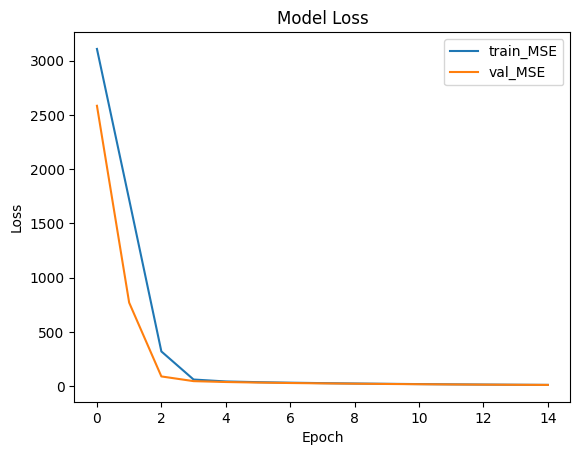

In [ ]:
# Pérdida durante el entrenamiento
loss = history.history['loss']


# Gráfica de la pérdida en función de las épocas
plt.plot(loss, label = 'train_MSE')
plt.plot(history.history['val_loss'], label = 'val_MSE')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

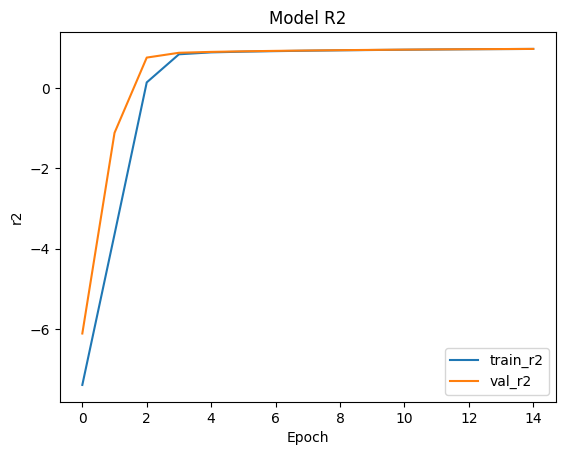

In [ ]:
r2_train = history.history['r2_score']
r2_val = history.history['val_r2_score']

# Graficar la precisión
plt.plot(r2_train, label='train_r2')
plt.plot(r2_val, label='val_r2')
plt.title('Model R2')
plt.xlabel('Epoch')
plt.ylabel('r2')
plt.legend()
plt.show()

Podemos notar como con el paso de las épocas, las métricas del modelo mejoran notoriamente, observamos que las métricas con datos de validación se optimizan muy similarmente a las métricas con datos de entrenamiento.

**Métricas datos entrenamiento**

In [ ]:
# Predicciones con los datos de entrenamiento
predictions_train = model1.predict(X_train)

# Imprimimos las métricas de entrenamiento
# Calcular y imprimir el Mean Squared Error (MSE)
mse = round(mean_squared_error(y_train, predictions_train), 5)
print(f"\nMean Squared Error (MSE): {mse}")

# Calcular y imprimir el Root Mean Squared Error (RMSE)
rmse = round(mean_squared_error(y_train, predictions_train, squared=False), 5)
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

# Calcular y imprimir el Mean Absolute Error (MAE)
mae = round(mean_absolute_error(y_train, predictions_train), 5)
print(f"\nMean Absolute Error (MAE): {mae}")

# Calcular y imprimir el Error Porcentual Absoluto Medio (MAPE)
mape = round(mean_absolute_percentage_error(y_train, predictions_train),5)
print(f"\nEl error (MAPE) de train es: {mape}")

# Calcular y imprimir el coeficiente de determinación (R cuadrado)
r2 = round(r2_score(y_train, predictions_train), 5)
print(f"\nCoefficient of Determination (R^2): {r2}")


250/250 [==============================] - 0s 2ms/step

Mean Squared Error (MSE): 10.025659561157227

Root Mean Squared Error (RMSE): 3.166330099105835

Mean Absolute Error (MAE): 2.5136001110076904

El error (MAPE) de train es: 0.057020001113414764

Coefficient of Determination (R^2): 0.97294


**Métricas datos de test**

In [ ]:
# Predicciones con los datos de test
predictions_test = model1.predict(X_test)

# Imprimimos las métricas de entrenamiento

# Calcular y imprimir el Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, predictions_test), 5)
print(f"\nMean Squared Error (MSE): {mse}")

# Calcular y imprimir el Root Mean Squared Error (RMSE)
rmse = round(mean_squared_error(y_test, predictions_test, squared=False), 5)
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

# Calcular y imprimir el Mean Absolute Error (MAE)
mae = round(mean_absolute_error(y_test, predictions_test), 5)
print(f"\nMean Absolute Error (MAE): {mae}")

# Calcular y imprimir el Error Porcentual Absoluto Medio (MAPE)
mape = round(mean_absolute_percentage_error(y_test, predictions_test),5)
print(f"\nEl error (MAPE) de test es: {mape}")

# Calcular y imprimir el coeficiente de determinación (R cuadrado)
r2 = round(r2_score(y_test, predictions_test), 5)
print(f"\nCoefficient of Determination (R^2): {r2}")


63/63 [==============================] - 0s 2ms/step

Mean Squared Error (MSE): 10.419099807739258

Root Mean Squared Error (RMSE): 3.2278599739074707

Mean Absolute Error (MAE): 2.5721499919891357

El error (MAPE) de test es: 0.05883000046014786

Coefficient of Determination (R^2): 0.97133


El modelo de regresión presenta un buen ajuste, con altos coeficientes de determinación (`R^2`) de aproximadamente **0.98** en entrenamiento y en test, indicando que explica gran parte de la variabilidad de los datos. Los errores de predicción son bajos, evidenciados por el `MSE`, `RMSE`, `MAE` y `MAPE`.

----

----

-----

-----

# Problema 2

En el siguiente problema, se presenta un conjunto de datos sobre diferentes variedades de frijoles secos. El objetivo es desarrollar un modelo de clasificación que pueda distinguir entre siete variedades registradas de frijoles secos, utilizando características como forma, tamaño, tipo y estructura. Se utilizó un sistema de visión por computadora para obtener imágenes de los granos de frijol y luego se llevó a cabo la segmentación y extracción de características para obtener un total de 16 atributos, incluidas 12 dimensiones y 4 formas.

In [ ]:
# Cargamos el dataset Dry-Bean
Drybean = pd.read_csv("TP1-2/TP1-2-Dry-Bean-Dataset.csv")

In [ ]:
#Dataset sin las variables 'Aspect ratio (K)' y 'Roundness (R)'
Drybean.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  28395    610.291       208.178117       173.888747      0.549812   
1  28734    638.018       200.524796       182.734419      0.411785   
2  29380    624.110       212.826130       175.931143      0.562727   
3  30008    645.884       210.557999       182.516516      0.498616   
4  30140    620.134       201.847882       190.279279      0.333680   

   ConvexArea  EquivDiameter    Extent  Solidity  Compactness  ShapeFactor1  \
0       28715     190.141097  0.763923  0.988856     0.913358      0.007332   
1       29172     191.272750  0.783968  0.984986     0.953861      0.006979   
2       29690     193.410904  0.778113  0.989559     0.908774      0.007244   
3       30724     195.467062  0.782681  0.976696     0.928329      0.007017   
4       30417     195.896503  0.773098  0.990893     0.970516      0.006697   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.003147      0.834222      0.998724  SEKER  
1      0.003564      0.909851      0.998430  SEKER  
2      0.003048      0.825871      0.999066  SEKER  
3      0.003215      0.861794      0.994199  SEKER  
4      0.003665      0.941900      0.999166  SEKER

**Variables:**

*   `Area (A)`: El área de una zona de frijol y el número de píxeles dentro de sus límites.
*   `Perimeter (P)`: La circunferencia del frijol se define como la longitud de su borde.
*   `Major axis length (L)`: La distancia entre los extremos de la línea más larga que se puede dibujar desde un frijol.
*   `Minor axis length (l)`: La línea más larga que se puede dibujar desde el frijol mientras está perpendicular al eje principal.
*   `Eccentricity (Ec)`: Excentricidad de la elipse que tiene los mismos momentos que la región.
*   `Convex area (C)`: Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.
*   `Equivalent diameter (Ed)`: El diámetro de un círculo que tiene el mismo área que el área de una semilla de frijol.
*  `Extent (Ex)`: La relación de los píxeles en el cuadro delimitador con respecto al área del frijol.
*  `Solidity (S)`: También conocida como convexidad. La relación de los píxeles en la envoltura convexa con respecto a los que se encuentran en los frijoles.
*   `Compactness (CO)`: Mide la redondez de un objeto: Ed/L.
*   `ShapeFactor1 (SF1)`.
*   `ShapeFactor2 (SF2)`.
*   `ShapeFactor3 (SF3)`.
*   `ShapeFactor4 (SF4)`.

---

**Clases:**

`Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira.`

---


Además, se requiere calcular y agregar al conjunto de datos las siguientes características:


*   `Aspect ratio (K)`: Relación entre la longitud del eje mayor (L) y la longitud del eje menor (l) .
*  `Roundness (R)`: Se debe calcular utilizando la fórmula (4piA)/(P^2).

Estas nuevas características calculadas se utilizarán como parte del conjunto de datos para el entrenamiento y evaluación del modelo de clasificación.


In [ ]:
# Calculamos el Aspect ratio (K) y la Roundness (R) para cada paciente en el dataset
Drybean['Aspect_ratio'] = Drybean['MajorAxisLength'] / Drybean['MinorAxisLength']
Drybean['Roundness'] = (4 * np.pi * Drybean['Area']) / (Drybean['Perimeter'] ** 2)

In [ ]:
#Visualizamos el dataset
Drybean.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  28395    610.291       208.178117       173.888747      0.549812   
1  28734    638.018       200.524796       182.734419      0.411785   
2  29380    624.110       212.826130       175.931143      0.562727   
3  30008    645.884       210.557999       182.516516      0.498616   
4  30140    620.134       201.847882       190.279279      0.333680   

   ConvexArea  EquivDiameter    Extent  Solidity  Compactness  ShapeFactor1  \
0       28715     190.141097  0.763923  0.988856     0.913358      0.007332   
1       29172     191.272750  0.783968  0.984986     0.953861      0.006979   
2       29690     193.410904  0.778113  0.989559     0.908774      0.007244   
3       30724     195.467062  0.782681  0.976696     0.928329      0.007017   
4       30417     195.896503  0.773098  0.990893     0.970516      0.006697   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  Aspect_ratio  Roundness  
0      0.003147      0.834222      0.998724  SEKER      1.197191   0.958027  
1      0.003564      0.909851      0.998430  SEKER      1.097356   0.887034  
2      0.003048      0.825871      0.999066  SEKER      1.209713   0.947849  
3      0.003215      0.861794      0.994199  SEKER      1.153638   0.903936  
4      0.003665      0.941900      0.999166  SEKER      1.060798   0.984877

In [ ]:
Drybean.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
Aspect_ratio       float64
Roundness          float64
dtype: object

In [ ]:
Drybean.shape

(13611, 17)

### **Análisis exploratorio**

En primer lugar, dividiremos nuestro set de datos en Train (80%) y Test (20).

In [ ]:
#Seleccionamos las variables
X = Drybean[['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','Compactness','ShapeFactor1',	'ShapeFactor2','ShapeFactor3','ShapeFactor4','Aspect_ratio','Roundness']]
y = Drybean['Class'] # Variable a predecir

In [ ]:
# Dividimos los datos en conjunto de entrenamiento (80%) y conjunto de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10888, 16), (2723, 16), (10888,), (2723,))

In [ ]:
#Obtenemos el df de entrenamiento completo
Drybean_train = pd.concat([X_train, y_train], axis=1)

El análisis exploratorio se realizará utilizando únicamente los datos de entrenamiento, para evitar el Data Leakage, lo cual es crucial para comprender las características y patrones presentes en los datos antes de la construcción del modelo.

In [ ]:
Drybean_train.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   10888.000000  10888.000000     10888.000000     10888.000000   
mean    52864.565577    853.697640       319.518800       201.986935   
std     29210.632168    213.393349        85.242378        44.855591   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36228.250000    702.956000       253.373928       175.423395   
50%     44568.000000    793.503500       296.381262       192.345009   
75%     60893.750000    974.154500       375.711078       216.363148   
max    254616.000000   1985.370000       738.860153       460.198497   

       Eccentricity     ConvexArea  EquivDiameter        Extent      Solidity  \
count  10888.000000   10888.000000   10888.000000  10888.000000  10888.000000   
mean       0.750933   53580.793534     252.653113      0.749820      0.987148   
std        0.091533   29656.103474      58.957437      0.048835      0.004656   
min        0.218951   20684.000000     161.243764      0.555315      0.919246   
25%        0.716615   36612.750000     214.772532      0.718634      0.985657   
50%        0.763960   45117.500000     238.213644      0.759540      0.988291   
75%        0.809569   61803.750000     278.446278      0.786851      0.990008   
max        0.908167  263261.000000     569.374358      0.866195      0.994677   

        Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
count  10888.000000  10888.000000  10888.000000  10888.000000  10888.000000   
mean       0.799982      0.006572      0.001718      0.643724      0.995079   
std        0.061262      0.001126      0.000593      0.098292      0.004346   
min        0.645368      0.002778      0.000564      0.416499      0.947687   
25%        0.763217      0.005913      0.001160      0.582500      0.993726   
50%        0.801456      0.006648      0.001700      0.642332      0.996398   
75%        0.833793      0.007289      0.002166      0.695210      0.997880   
max        0.987303      0.010451      0.003665      0.974767      0.999733   

       Aspect_ratio     Roundness  
count  10888.000000  10888.000000  
mean       1.582385      0.873601  
std        0.244803      0.059303  
min        1.024868      0.489618  
25%        1.433756      0.833318  
50%        1.549754      0.883483  
75%        1.703504      0.916891  
max        2.388873      0.990685

In [ ]:
#Utilizamos la funcion datos_estadisticos definida anteriormente
datos_estadisticos(Drybean_train)

--------------------
Columna:  Area
Cantidad de valores nulos:  0
Cantidad de valores únicos:  9859
Tipo de dato:  int64
Media:  52864.56557678178
Desvío estándar:  29210.632168449574
Mínimo:  20420
Máximo:  254616
--------------------
--------------------
Columna:  Perimeter
Cantidad de valores nulos:  0
Cantidad de valores únicos:  10718
Tipo de dato:  float64
Media:  853.6976403379867
Desvío estándar:  213.39334902001065
Mínimo:  524.736
Máximo:  1985.37
--------------------
--------------------
Columna:  MajorAxisLength
Cantidad de valores nulos:  0
Cantidad de valores únicos:  10844
Tipo de dato:  float64
Media:  319.5188000240715
Desvío estándar:  85.24237782499995
Mínimo:  183.601165003839
Máximo:  738.860153481881
--------------------
--------------------
Columna:  MinorAxisLength
Cantidad de valores nulos:  0
Cantidad de valores únicos:  10844
Tipo de dato:  float64
Media:  201.98693541442677
Desvío estándar:  44.85559054655177
Mínimo:  122.512653450744
Máximo:  460.1984968278

In [ ]:
# Chequemos si hay registros con valores nulos
Drybean_train.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Aspect_ratio       0
Roundness          0
Class              0
dtype: int64

In [ ]:
# Chequemos si hay registros duplicados
Drybean_train.duplicated().sum()

44

In [ ]:
#Registros duplicados
Drybean_train[Drybean_train.duplicated() == True]

Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
6255  51903    908.476       366.544714       181.189268      0.869282   
6970  58891    966.204       397.793919       189.528762      0.879202   
5820  46863    867.433       347.442755       172.128791      0.868656   
5721  44710    832.120       332.068530       171.958309      0.855478   
6450  53679    949.603       354.397129       195.980161      0.833184   
7262  63408   1005.966       412.551649       196.337705      0.879494   
5553  38891    791.343       319.499996       156.869619      0.871168   
6750  56413    929.481       377.880838       191.039673      0.862794   
6982  59105    957.363       372.981361       205.545240      0.834448   
7208  62278    995.754       404.369421       197.145764      0.873101   
6139  50771    903.481       375.047391       172.787357      0.887552   
5807  46696    862.883       354.981027       168.054453      0.880838   
7143  61076    982.932       417.474629       187.277110      0.893735   
7285  63948    996.497       412.297178       198.877557      0.875971   
5508  33954    716.750       277.368480       156.356326      0.825970   
5958  48623    896.599       360.630734       173.717873      0.876333   
5842  47180    850.406       348.615238       172.904633      0.868336   
5599  40804    790.802       323.475648       163.287717      0.863241   
5938  48396    861.023       341.815489       181.429303      0.847509   
5548  38427    756.323       306.533886       160.591784      0.851782   
6046  49730    879.912       365.825690       173.569194      0.880278   
7113  60716    984.188       404.263088       192.452037      0.879415   
6220  51515    896.279       375.980183       174.907355      0.885204   
5679  43746    836.693       339.352567       165.411442      0.873161   
7010  59442    975.979       402.887444       190.149460      0.881616   
5812  46777    845.203       349.187769       171.167126      0.871618   
6080  50181    880.940       365.298096       175.486384      0.877054   
5837  47134    870.142       360.775000       167.488454      0.885706   
6510  54160    929.492       349.459450       202.934731      0.814110   
6763  56539    943.147       370.374563       196.675975      0.847360   
5505  33518    702.956       277.571399       154.305581      0.831240   
5630  42156    815.245       335.198243       160.936938      0.877200   
6787  56889    951.582       384.236934       190.177318      0.868923   
6802  57029    953.664       388.137971       187.927020      0.874971   
6689  55689    925.555       371.517829       192.522981      0.855255   
5715  44614    850.425       351.268986       162.308089      0.886848   
6630  55145    930.030       365.745053       198.056410      0.840691   
6581  54689    911.217       372.146327       187.816831      0.863303   
6609  54954    917.472       347.661334       204.850538      0.807969   
6441  53607    929.682       385.118850       177.724071      0.887151   
6326  52462    903.657       364.976965       183.830683      0.863892   
7234  62764   1003.767       409.207082       198.330199      0.874697   
6253  51894    901.802       367.354766       182.162461      0.868393   
7339  65766   1035.842       406.416622       207.242369      0.860218   

      ConvexArea  EquivDiameter    Extent  Solidity  Compactness  \
6255       52611     257.069936  0.708825  0.986543     0.701333   
6970       59522     273.829053  0.601420  0.989399     0.688369   
5820       47538     244.269983  0.700703  0.985801     0.703051   
5721       45234     238.592833  0.694104  0.988416     0.718505   
6450       54804     261.431110  0.715386  0.979472     0.737678   
7262       64200     284.136539  0.798791  0.987664     0.688730   
5553       39651     222.525412  0.650025  0.980833     0.696480   
6750       57007     268.006087  0.661240  0.989580     0.709234   
6982       60667     274.326126  0.757630  0.974253     0.735496

## Balanceo

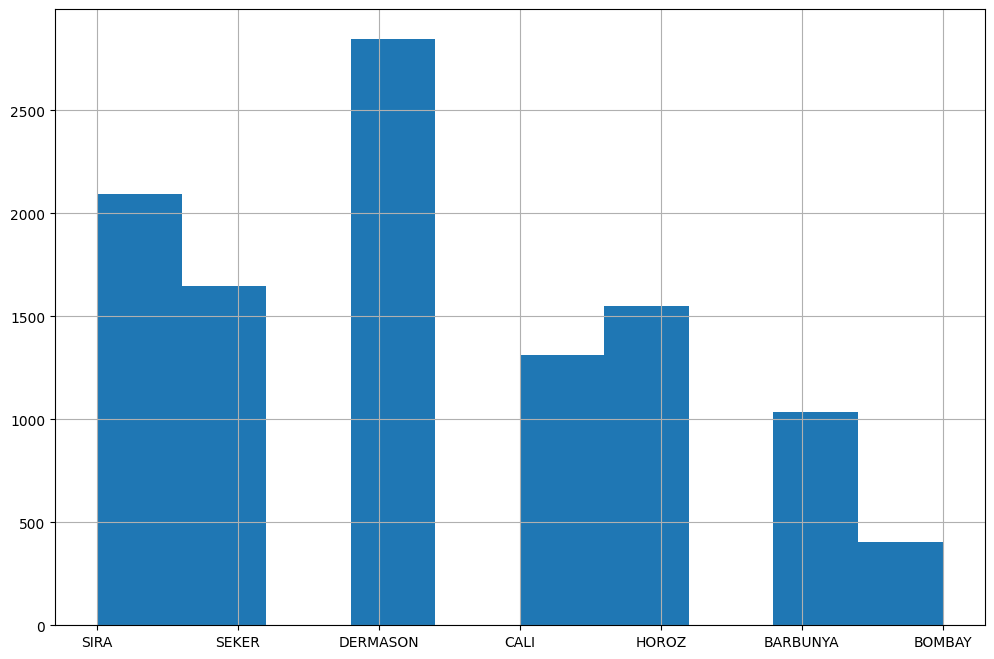

In [ ]:
# Visualizamos la cantidad de objetos de cada clase
Drybean_train['Class'].hist(figsize=(12, 8))
plt.show()

Viendo la diferencia en la cantidad de datos de cada clase, procedemos a hacer un balanceo de estas.

In [ ]:
mean = 1600
# Definir el sobremuestreo y submuestreo para clases específicas
over_sampler = RandomOverSampler(sampling_strategy={'BOMBAY': mean, 'CALI': mean, 'BARBUNYA':mean})  # Sobremuestreo para las clases 0 y 1
under_sampler = RandomUnderSampler(sampling_strategy={'DERMASON': mean, 'SIRA':mean})

In [ ]:
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

**Boxplots de las variables**

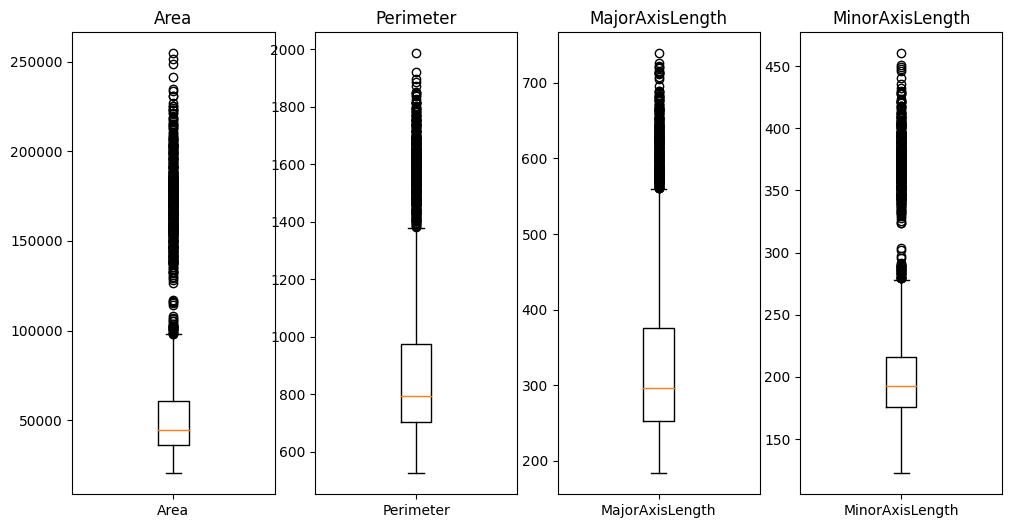

In [ ]:
# Boxplots columnas 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength'
plot_boxplots(Drybean_train, ['Area', 'Perimeter', 'MajorAxisLength','MinorAxisLength'])

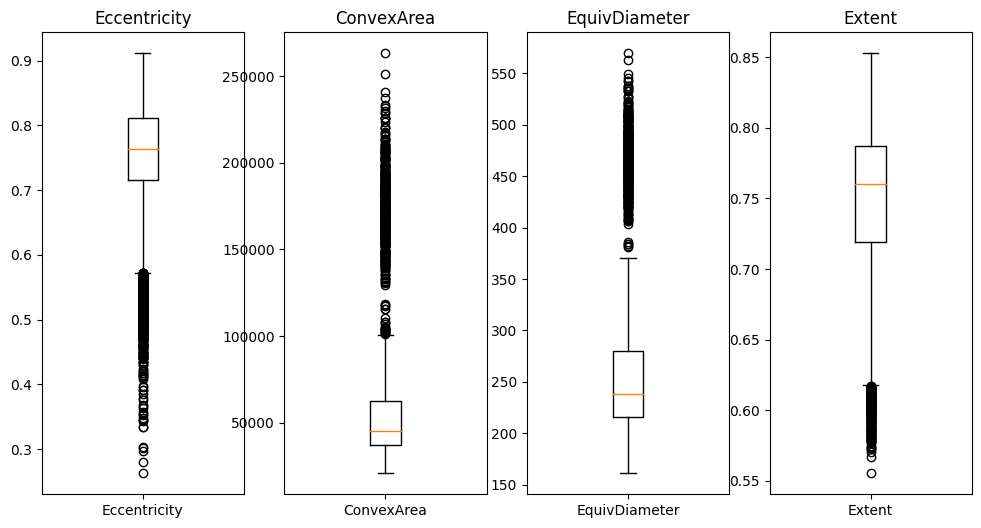

In [ ]:
# Boxplots columnas 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent'
plot_boxplots(Drybean_train, ['Eccentricity', 'ConvexArea', 'EquivDiameter','Extent'])

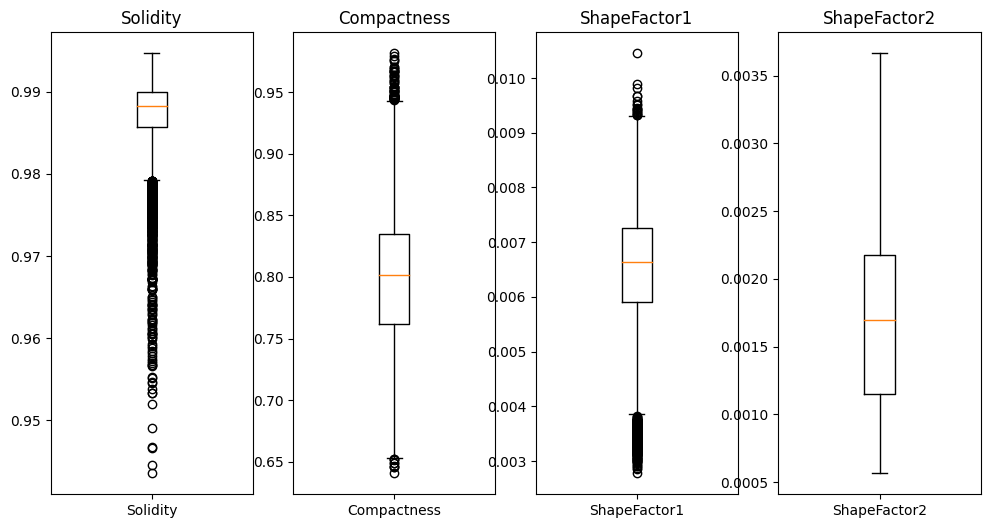

In [ ]:
# Boxplots columnas 'Solidity', 'Compactness', 'ShapeFactor1', 'ShapeFactor2'
plot_boxplots(Drybean_train, ['Solidity', 'Compactness', 'ShapeFactor1','ShapeFactor2'])

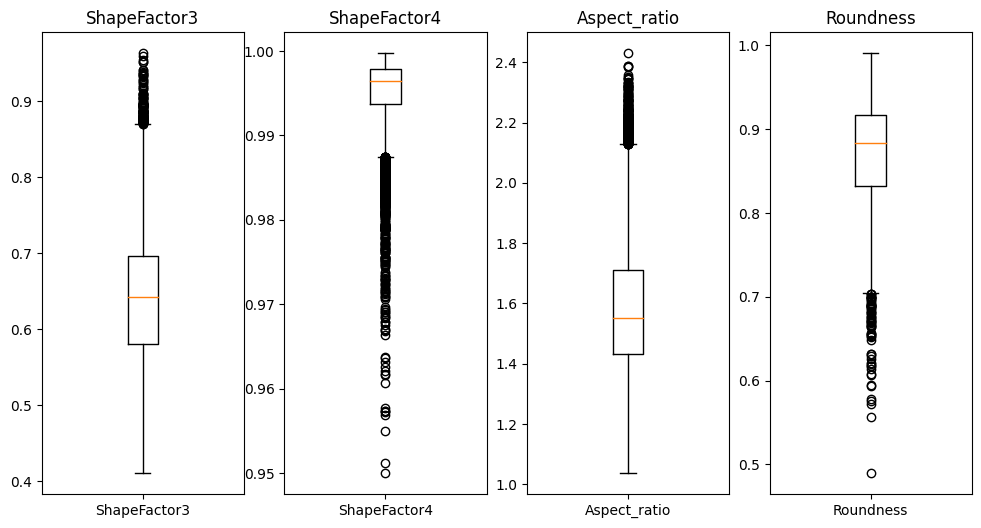

In [ ]:
# Boxplots columnas 'ShapeFactor3', 'ShapeFactor4', 'Aspect_ratio', 'Roundness'
plot_boxplots(Drybean_train, ['ShapeFactor3', 'ShapeFactor4', 'Aspect_ratio','Roundness'])

A través de boxplots, pudimos observar las distribuciones de las distintas variables. Se presentan algunos valores inusuales, pero consideramos que no se tratan de valores atípicos, sino frijoles secos con distintas características al resto.

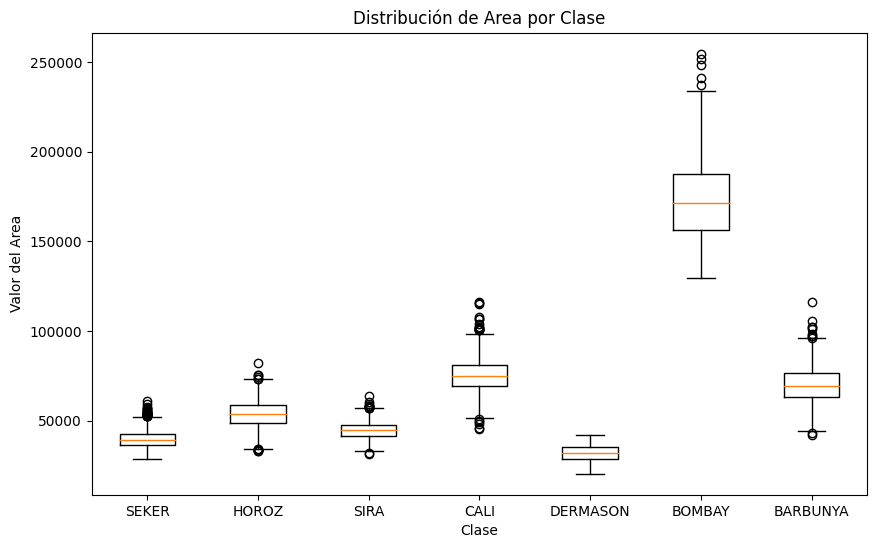

In [ ]:
#Vemos como el tamaño del area influye en cada clase
plt.figure(figsize=(10, 6))
plt.boxplot([Drybean_train[Drybean_train['Class'] == 'SEKER']['Area'],
             Drybean_train[Drybean_train['Class'] == 'HOROZ']['Area'],
             Drybean_train[Drybean_train['Class'] == 'SIRA']['Area'],
             Drybean_train[Drybean_train['Class'] == 'CALI']['Area'],
             Drybean_train[Drybean_train['Class'] == 'DERMASON']['Area'],
             Drybean_train[Drybean_train['Class'] == 'BOMBAY']['Area'],
             Drybean_train[Drybean_train['Class'] == 'BARBUNYA']['Area']],
            labels=['SEKER', 'HOROZ', 'SIRA', 'CALI', 'DERMASON', 'BOMBAY', 'BARBUNYA'])
plt.xlabel('Clase')
plt.ylabel('Valor del Area')
plt.title('Distribución de Area por Clase')
plt.show()

In [ ]:
# Vemos la matriz de correlación
Drybean_sin_clase = Drybean_train.drop('Class', axis=1)
Drybean_sin_clase.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966543         0.931822         0.951987   
Perimeter        0.966543   1.000000         0.977422         0.913748   
MajorAxisLength  0.931822   0.977422         1.000000         0.827227   
MinorAxisLength  0.951987   0.913748         0.827227         1.000000   
Eccentricity     0.264525   0.388146         0.538678         0.018282   
ConvexArea       0.999941   0.967518         0.932604         0.951726   
EquivDiameter    0.984851   0.991358         0.961900         0.949007   
Extent           0.055321  -0.019516        -0.075411         0.145964   
Solidity        -0.190484  -0.298431        -0.278678        -0.150071   
Compactness     -0.265857  -0.404865        -0.566135        -0.014432   
ShapeFactor1    -0.848085  -0.865425        -0.775135        -0.946974   
ShapeFactor2    -0.638828  -0.767359        -0.858823        -0.472417   
ShapeFactor3    -0.269785  -0.406294        -0.565780        -0.018539   
ShapeFactor4    -0.353235  -0.427084        -0.479146        -0.262823   
Aspect_ratio     0.239989   0.383674         0.548521        -0.009308   
Roundness       -0.355545  -0.546053        -0.594336        -0.209585   

                 Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  \
Area                 0.264525    0.999941       0.984851  0.055321 -0.190484   
Perimeter            0.388146    0.967518       0.991358 -0.019516 -0.298431   
MajorAxisLength      0.538678    0.932604       0.961900 -0.075411 -0.278678   
MinorAxisLength      0.018282    0.951726       0.949007  0.145964 -0.150071   
Eccentricity         1.000000    0.266320       0.315823 -0.316637 -0.296245   
ConvexArea           0.266320    1.000000       0.985115  0.053515 -0.200010   
EquivDiameter        0.315823    0.985115       1.000000  0.029933 -0.225594   
Extent              -0.316637    0.053515       0.029933  1.000000  0.194472   
Solidity            -0.296245   -0.200010      -0.225594  0.194472  1.000000   
Compactness         -0.969653   -0.267735      -0.325662  0.351496  0.302896   
ShapeFactor1         0.020447   -0.848088      -0.893316 -0.141891  0.148234   
ShapeFactor2        -0.858642   -0.640424      -0.712921  0.235181  0.340373   
ShapeFactor3        -0.980574   -0.271687      -0.328242  0.345033  0.306816   
ShapeFactor4        -0.445717   -0.359508      -0.389970  0.146489  0.703333   
Aspect_ratio         0.923018    0.241576       0.302125 -0.366854 -0.266663   
Roundness           -0.720298   -0.360139      -0.434079  0.343740  0.609173   

                 Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
Area               -0.265857     -0.848085     -0.638828     -0.269785   
Perimeter          -0.404865     -0.865425     -0.767359     -0.406294   
MajorAxisLength    -0.566135     -0.775135     -0.858823     -0.565780   
MinorAxisLength    -0.014432     -0.946974     -0.472417     -0.018539   
Eccentricity       -0.969653      0.020447     -0.858642     -0.980574   
ConvexArea         -0.267735     -0.848088     -0.640424     -0.271687   
EquivDiameter      -0.325662     -0.893316     -0.712921     -0.328242   
Extent              0.351496     -0.141891      0.235181      0.345033   
Solidity            0.302896      0.148234      0.340373      0.306816   
Compactness         1.000000     -0.009199      0.867955      0.998669   
ShapeFactor1       -0.009199      1.000000      0.471068     -0.008280   
ShapeFactor2        0.867955      0.471068      1.000000      0.871972   
ShapeFactor3        0.998669     -0.008280      0.871972      1.000000   
ShapeFactor4        0.480979      0.248089      0.526905      0.480891   
Aspect_ratio       -0.987556      0.023921     -0.836749     -0.978353   
Roundness           0.767018      0.230196      0.781087      0.762053   

                 ShapeFactor4  Aspect_ratio  Roundness  
Area                -0.353235      0.239989  -0.355545  
Perimeter           -0.42708

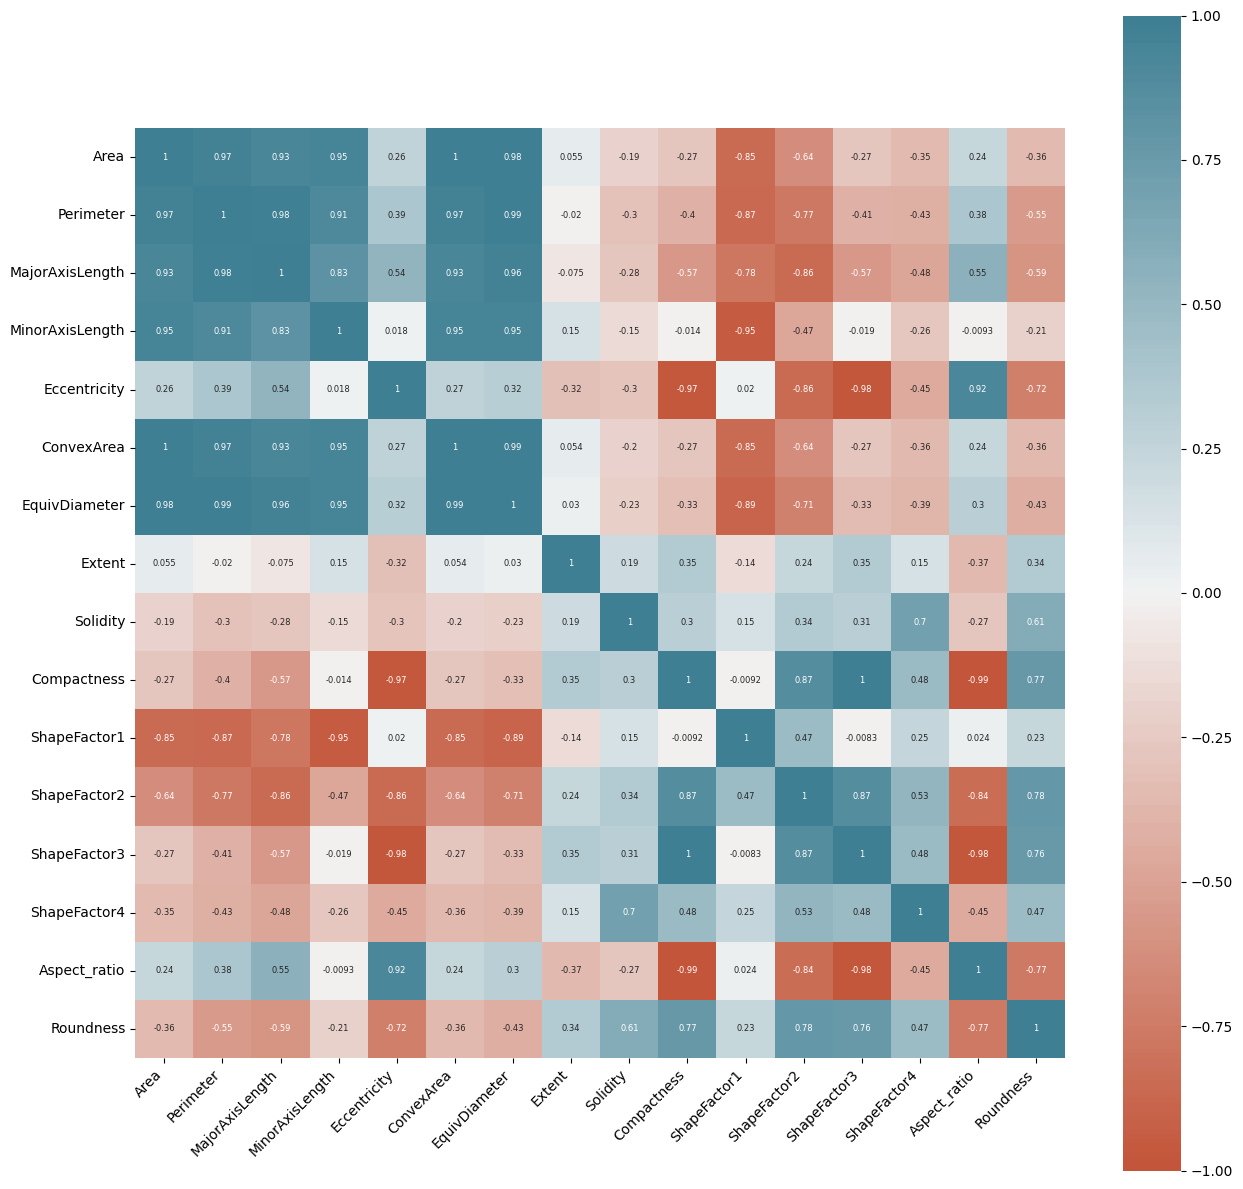

In [ ]:
corr(Drybean_sin_clase)

Analizando los distintos niveles de correlación que hay entre las variables, podemos notar que algunos de los mas elevados son entre las variables `Perimeter`, `Area` , `MajorAxisLenght`, `MinorAxisLenght`, `ConvexArea`,`EquivDiameter`.

Vemos que hay una correlacion de 1 entre `Area` y `ConvexArea` por lo que decidimos eliminar `ConvexArea`
Y hay una correlacion de 1 entre `Compactness` y `ShapeFactor3` por lo que decidimos eliminar `Compactness`

### **Preprocesamiento**

In [ ]:
#Funcion de preprocesamiento de los datos
def preprocess_data(x, y, variable_objetive):
    y = pd.DataFrame(y)
    # Diccionario para mapear la variable categorica
    mapping = {'SEKER': int(0),
              'BARBUNYA': int(1),
              'BOMBAY' : int(2),
              'CALI': int(3),
              'HOROZ': int(4),
              'SIRA': int(5),
              'DERMASON': int(6),
              }

    # Aplicamos el mapeo a la columna 'Class'
    y.loc[:,'Class'] = y['Class'].map(mapping)
    y['Class'] = y['Class'].astype(int)

    # Calculamos el Aspect ratio (K) y la Roundness (R) para cada paciente en el dataset
    x['Aspect_ratio'] = x['MajorAxisLength'] / x['MinorAxisLength']
    x['Roundness'] = (4 * np.pi * x['Area']) / (x['Perimeter'] ** 2)

    # Defino un diccionario para definir el tipo de dato de cada columna
    column_types = {
        'Area': "float64",
        'Perimeter': "float64",
        'MajorAxisLength': "float64",
        'MinorAxisLength': "float64",
        'Eccentricity': "float64",
        'ConvexArea': "float64",
        'EquivDiameter': "float64",
        'Extent': "float64",
        'Solidity': "float64",
        'Compactness': "float64",
        'ShapeFactor1': "float64",
        'ShapeFactor2': "float64",
        'ShapeFactor3': "float64",
        'ShapeFactor4': "float64",
        'Aspect_ratio': "float64",
        'Roundness': "float64"
    }

    x = x.drop(columns=['ConvexArea','Compactness'])
    # Diccionario para almacenar media y desvío estándar de las columnas numéricas.
    numeric_stats = {}

    preprocessed_df = pd.DataFrame(x)

    # Preprocesamiento del set de entrenamiento
    for col_name, col_type in column_types.items():
      # Verifico si la columna está presente en el DataFrame
      if col_name in preprocessed_df.columns:
        # Obtengo el índice de la columna por su nombre
        col_values = preprocessed_df[col_name]
        col_mean = col_values.mean()
        col_std = col_values.std()

        # Normalizo la columna si es numérica
        if col_type == "int64":
            preprocessed_df[col_name] = (col_values - col_mean) / col_std

        # Almaceno media y desvío estándar
        numeric_stats[col_name] = {
            "mean": col_mean,
            "std": col_std
        }

    # Agrego la "variable_objetive" al dataset preprocesado
    preprocessed_df[variable_objetive] = y

    # Eliminamos valores nulos
    preprocessed_df = preprocessed_df.dropna()

    # x e y preprocesados
    x_processed = preprocessed_df.drop(variable_objetive, axis=1).values.astype(np.float32)
    y_processed = preprocessed_df[variable_objetive].values.astype(np.float32)

    return x_processed, y_processed

In [ ]:
# Luego llamamos a la función para preprocesar los datos
X_train, y_train = preprocess_data(X_train, y_train, 'Class')

### **Modelo**

In [ ]:
#Preprocesamos los datos de test
X_test, y_test = preprocess_data(X_test, y_test,'Class')

In [ ]:
#Modelo
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(14,)),                                 # Numero de variables de entrada

    tf.keras.layers.Dense(units=100, activation='relu'),                # Capa oculta con 100 neuronas

    tf.keras.layers.Dense(units=100, activation=tf.nn.leaky_relu),      # Capa oculta con 100 neuronas

    tf.keras.layers.Dropout(0.15),                                      #15% de probabilidad de apagar neuronas en la capa anterior

    tf.keras.layers.Dense(units=60, activation=tf.nn.leaky_relu),       # Capa oculta con 60 neuronas

    tf.keras.layers.Dropout(0.05),                                      #0.5% de probabilidad de apagar neuronas en la capa anterior

    tf.keras.layers.Dense(units=30, activation=tf.nn.leaky_relu),       # Otra capa oculta con 30 neuronas

    tf.keras.layers.Dense(units=15, activation=tf.nn.leaky_relu),       # Otra capa oculta con 15 neuronas

    tf.keras.layers.Dense(units=7, activation='softmax')                # Capa de salida con 1 unidad y activación softmax
])

# Optimizador Adam para el entrenamiento del modelo.
optimizer = tf.keras.optimizers.Adam()

model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 100)               1500      
                                                                 
 dense_91 (Dense)            (None, 100)               10100     
                                                                 
 dropout_30 (Dropout)        (None, 100)               0         
                                                                 
 dense_92 (Dense)            (None, 60)                6060      
                                                                 
 dropout_31 (Dropout)        (None, 60)                0         
                                                                 
 dense_93 (Dense)            (None, 30)                1830      
                                                                 
 dense_94 (Dense)            (None, 15)              

In [ ]:
#Buscamos el mejor modelo, reduciendo el loss
early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1, mode="min")

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min"
)

# Número de épocas de entrenamiento
EPOCHS = 200

# Entrena el modelo
history = model2.fit(x=X_train, y=y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/200
349/349 [==============================] - 2s 3ms/step - loss: 81.1038 - accuracy: 0.1517 - val_loss: 3.3504 - val_accuracy: 0.2846 - lr: 0.0010
Epoch 2/200
349/349 [==============================] - 1s 3ms/step - loss: 2.5188 - accuracy: 0.2381 - val_loss: 1.7553 - val_accuracy: 0.3327 - lr: 0.0010
Epoch 3/200
349/349 [==============================] - 1s 3ms/step - loss: 2.0150 - accuracy: 0.2760 - val_loss: 1.6639 - val_accuracy: 0.3819 - lr: 0.0010
Epoch 4/200
349/349 [==============================] - 1s 3ms/step - loss: 1.7988 - accuracy: 0.3038 - val_loss: 1.7168 - val_accuracy: 0.4234 - lr: 0.0010
Epoch 5/200
349/349 [==============================] - 1s 3ms/step - loss: 1.6458 - accuracy: 0.3356 - val_loss: 1.5005 - val_accuracy: 0.4620 - lr: 0.0010
Epoch 6/200
349/349 [==============================] - 1s 3ms/step - loss: 1.5276 - accuracy: 0.3735 - val_loss: 1.4153 - val_accuracy: 0.4943 - lr: 0.0010
Epoch 7/200
349/349 [==============================] - 1s 2ms/s

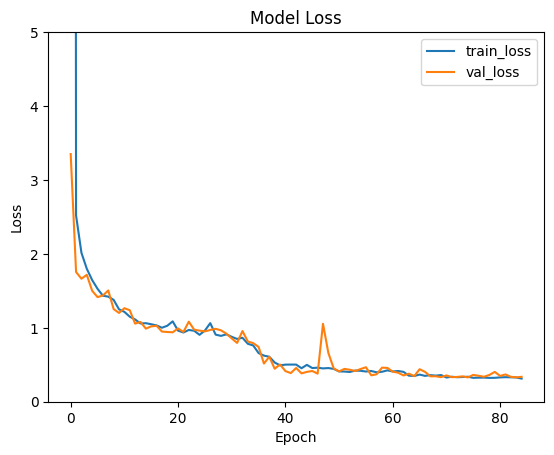

In [ ]:
# Pérdida durante el entrenamiento
loss = history.history['loss']


# Gráfica de la pérdida en función de las épocas
plt.plot(loss, label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.legend(loc='upper right')
plt.show()

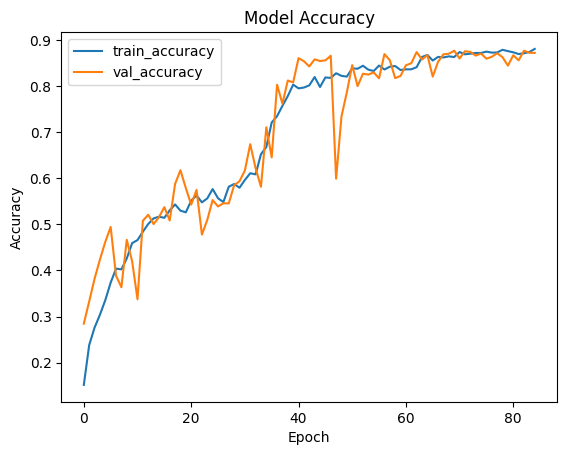

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']


# Graficar la precisión
plt.plot(accuracy_train, label='train_accuracy')
plt.plot(accuracy_val, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Observando la evolución del loss y la accuracy durante el entrenamiento, se pueden extraer las siguientes conclusiones:


*   `Convergencia del loss`: Tanto en el conjunto de entrenamiento como en el de validación, el loss disminuye de forma consistente a lo largo de las épocas.

*   `Precisión del modelo`: La accuracy del conjunto de validación presenta fluctuaciones a lo largo del entrenamiento, en ocasiones superando e incluso quedando por debajo de la accuracy del conjunto de entrenamiento. Pero se puede notar la mejora de la métrica a lo largo de las épocas.


----

----

----

-----

# Problema 3


En este problema, se proporciona un conjunto de datos que contiene imágenes de escenas naturales de todo el mundo. El objetivo es construir un modelo de clasificación utilizando redes neuronales convolucionales (CNN) para clasificar estas imágenes en una de las seis categorías predefinidas.


El dataset proporcionado contiene alrededor de 25,000 imágenes de tamaño 150x150, distribuidas en seis categorías:

*   `buildings`
*   `forest`
*   `glacier`
*   `mountain`
*   `sea`
*   `street`

Las imágenes están divididas en tres conjuntos:

*   `Train`: Alrededor de 14,000 imágenes para entrenamiento.
*   `Test`: Alrededor de 3,000 imágenes para evaluación del modelo.
*   `Prediction`: Alrededor de 7,000 imágenes para predicción final.





### Cargamos los dataset

In [6]:
# Directorio de los datos
DATA_DIRECTORY_TRAIN = Path("TP1-3/seg_train/seg_train")
DATA_DIRECTORY_TEST = Path("TP1-3/seg_test/seg_test")
DATA_DIRECTORY_PRED = Path("TP1-3/seg_pred/seg_pred")


# Tamaño del lote (batch size)
BATCH_SIZE = 64


# Tamaño de las imágenes
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

# Carga los datos de entrenamiento y test (validacion)
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIRECTORY_TRAIN,
    label_mode="categorical",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
    )

test_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIRECTORY_TEST,
    label_mode="categorical",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
    )


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


Visualizamos las clases

In [7]:
# Obtiene los nombres de las clases
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


Visualizamos ejemplos

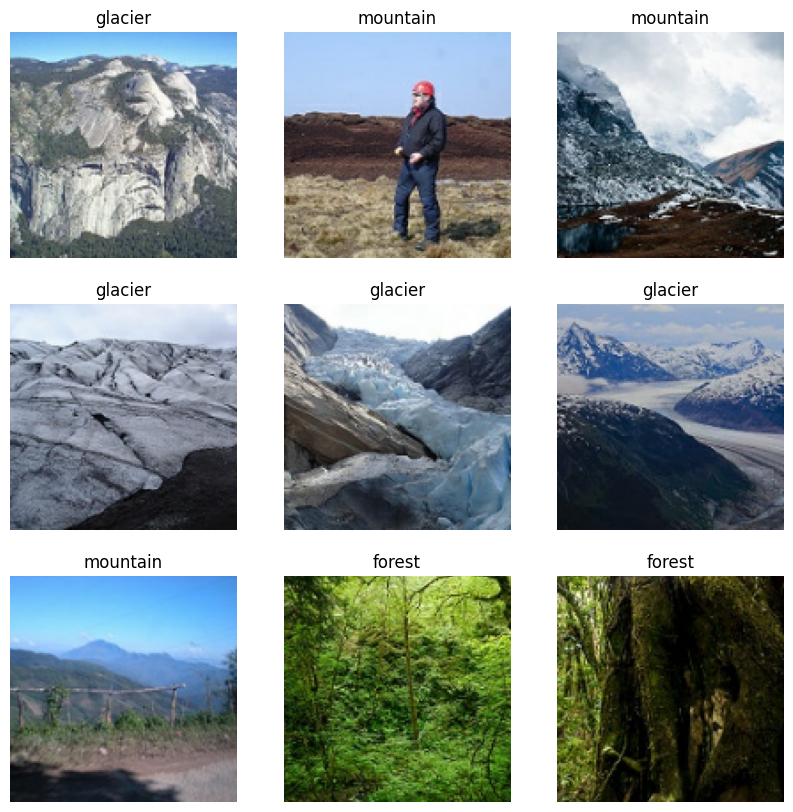

In [8]:
# Muestra algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    class_idx = list(labels[i]).index(1)
    plt.title(class_names[class_idx])
    plt.axis("off")

Mostrando imágenes de la clase: forest


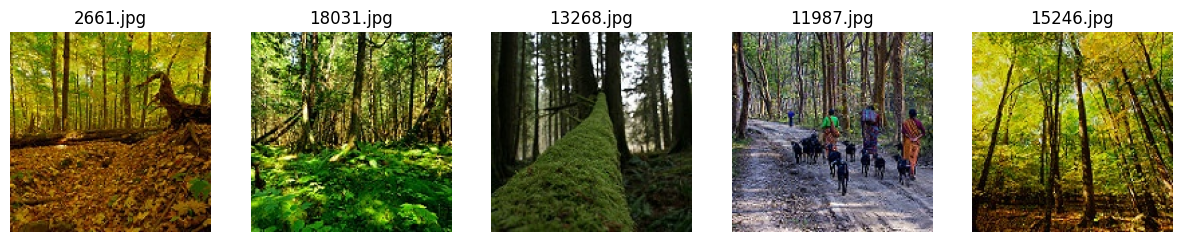

Mostrando imágenes de la clase: glacier


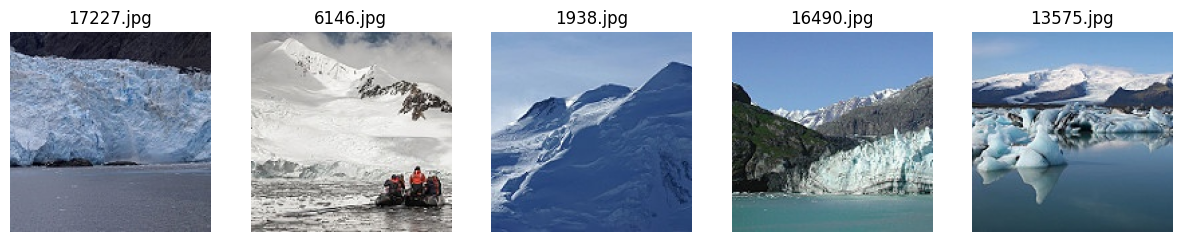

Mostrando imágenes de la clase: buildings


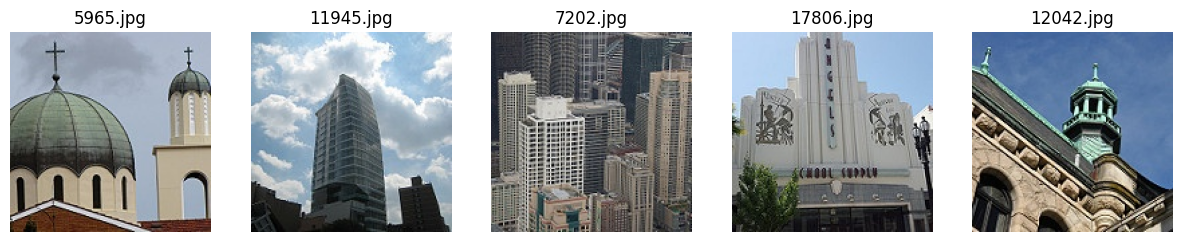

Mostrando imágenes de la clase: mountain


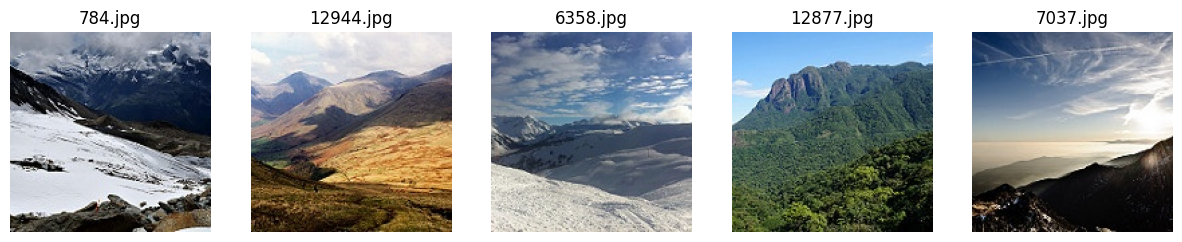

Mostrando imágenes de la clase: street


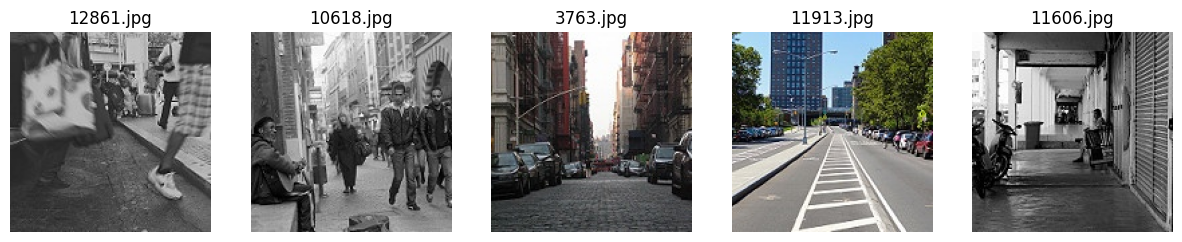

Mostrando imágenes de la clase: sea


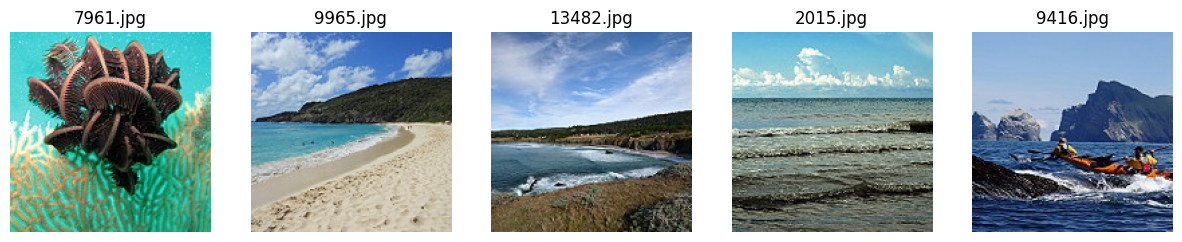

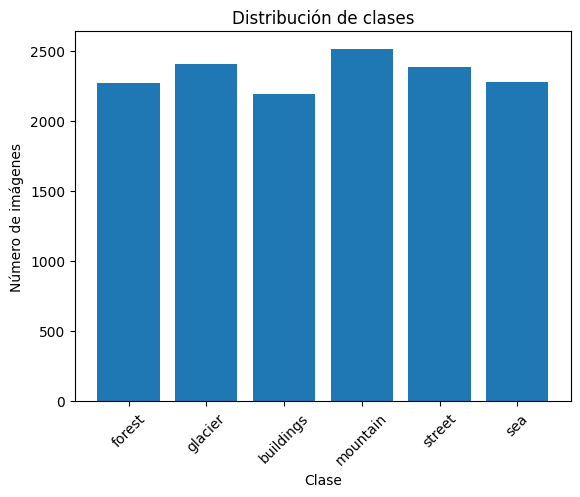

In [10]:
# Directorio que contiene las carpetas de clases
data_dir = DATA_DIRECTORY_TRAIN

# Lista de nombres de las clases (nombres de las carpetas)
classes = os.listdir(data_dir)

# Función para cargar y mostrar algunas imágenes de una clase específica
def show_images_from_class(class_name, num_images=5):
    class_dir = os.path.join(data_dir, class_name)
    images = os.listdir(class_dir)[:num_images]
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].set_title(img_name)
        axs[i].axis('off')
    plt.show()

# Mostrar algunas imágenes de cada clase
for class_name in classes:
    print(f"Mostrando imágenes de la clase: {class_name}")
    show_images_from_class(class_name)

# Histograma de distribución de clases
class_distribution = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) for class_name in classes}
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.title('Distribución de clases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Estadísticas básicas
image_sizes = []
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        width, height = img.size
        image_sizes.append((width, height))

image_sizes = np.array(image_sizes)
print("Estadísticas de tamaño de imagen:")
print(f"Tamaño mínimo: {np.min(image_sizes, axis=0)}")
print(f"Tamaño máximo: {np.max(image_sizes, axis=0)}")
print(f"Tamaño promedio: {np.mean(image_sizes, axis=0)}")
print(f"Tamaño mediano: {np.median(image_sizes, axis=0)}")

Estadísticas de tamaño de imagen:
Tamaño mínimo: [150  76]
Tamaño máximo: [150 150]
Tamaño promedio: [150.         149.90872168]
Tamaño mediano: [150. 150.]


### Preprocesamiento

In [11]:
# Funcion para preprocesar las imágenes
def preprocess_image(image_path, target_size=(128, 128)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    return img


#Funcion que toma un dataset de imagenes y un modelo, y hace la predicción de imagenes del dataset con el modelo.
def predicted_model(path_pred,model):

  # Lista de imagenes
  test_image_paths = list(path_pred.glob("*.jpg"))

  # Mostrar 5 imágenes con sus clases reales y previstas
  fig, axes = plt.subplots(1, 5, figsize=(15, 3))

  for i, ax in enumerate(axes):
      # Preprocesamos la imagen
      image_path = test_image_paths[i]
      image = preprocess_image(image_path)
      ax.imshow(image)
      ax.axis('off')

      image = np.expand_dims(image, axis=0)

      # Prediccion
      prediction = model.predict(image)
      predicted_class_index = np.argmax(prediction)
      predicted_class = class_names[predicted_class_index]


      # Resultados
      ax.set_title(f" Predicted: {predicted_class}")

  plt.tight_layout()
  plt.show()


## Modelo con capas densas

Arquitectura de la red

In [ ]:
def build_model(input_shape, output_labels):
    i = Input(input_shape, dtype=tf.float32)

    x = Rescaling(1./255)(i)
    x = RandomFlip("horizontal")(x)
    x = RandomFlip("vertical")(x)
    x = RandomTranslation(0.1, 0.1, fill_mode="reflect")(x)
    x = RandomContrast(0.2)(x)

    x = Flatten()(x)

    x = Dense(90, activation=tf.nn.leaky_relu)(x)
    x = Dropout(0.3)(x)
    x = Dense(70, activation=tf.nn.leaky_relu)(x)
    x = Dense(30, activation='relu')(x)
    x = Dense(20, activation='relu')(x)

    x = Dense(output_labels)(x)
    x = Activation("softmax")(x)

    return Model(inputs=[i], outputs=[x])


Construimos el modelo

In [ ]:
print("Building model....")
model_dense = build_model((IMAGE_HEIGHT, IMAGE_WIDTH, 3), num_classes)

# Optimizador Adam para el entrenamiento del modelo.
optimizer = tf.keras.optimizers.Adam()

model_dense.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy'])

print('Correctly constructed model')

Building model....
Correctly constructed model


In [ ]:
#Resumen del modelo
model_dense.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_translation (Random  (None, 128, 128, 3)       0         
 Translation)                                                    
                                                                 
 random_contrast (RandomCon  (None, 128, 128, 3)       0         
 trast)                                                      

In [ ]:
#Buscamos el mejor modelo desminuyendo el loss de validacion

early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-8, verbose=1, mode="min") # Frena cuando el val_loss deje de disminuir

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min"
)

# Número de épocas de entrenamiento
EPOCHS = 200

# Entrenamos el modelo
history = model_dense.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/200
220/220 [==============================] - 13s 37ms/step - loss: 2.0125 - accuracy: 0.1724 - val_loss: 1.7915 - val_accuracy: 0.1580 - lr: 0.0010
Epoch 2/200
220/220 [==============================] - 10s 43ms/step - loss: 1.7533 - accuracy: 0.2205 - val_loss: 1.6618 - val_accuracy: 0.2697 - lr: 0.0010
Epoch 3/200
220/220 [==============================] - 10s 45ms/step - loss: 1.6468 - accuracy: 0.2872 - val_loss: 1.5821 - val_accuracy: 0.3123 - lr: 0.0010
Epoch 4/200
220/220 [==============================] - 9s 42ms/step - loss: 1.5910 - accuracy: 0.3145 - val_loss: 1.5463 - val_accuracy: 0.2933 - lr: 0.0010
Epoch 5/200
220/220 [==============================] - 9s 38ms/step - loss: 1.5334 - accuracy: 0.3325 - val_loss: 1.4517 - val_accuracy: 0.3630 - lr: 0.0010
Epoch 6/200
220/220 [==============================] - 10s 43ms/step - loss: 1.4974 - accuracy: 0.3565 - val_loss: 1.4556 - val_accuracy: 0.3987 - lr: 0.0010
Epoch 7/200
220/220 [==============================] -

Probamos el modelo

1/1 [==============================] - 0s 45ms/step


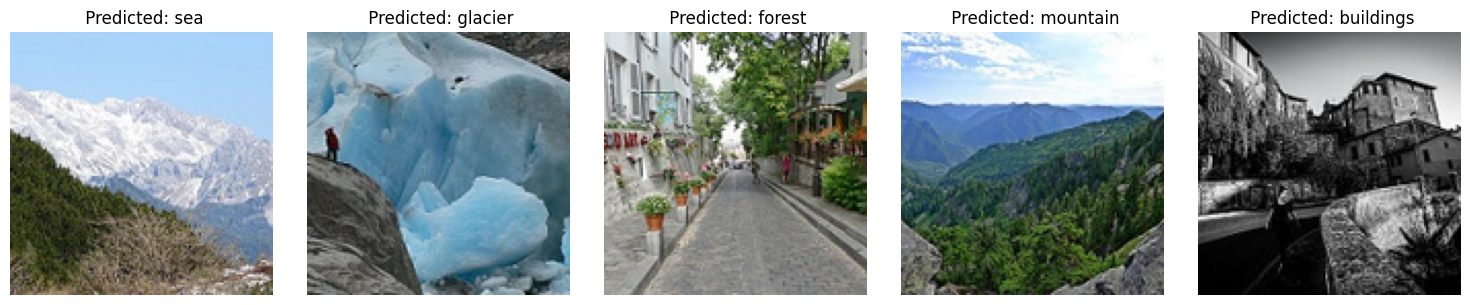

In [ ]:
predicted_model(DATA_DIRECTORY_PRED,model_dense)

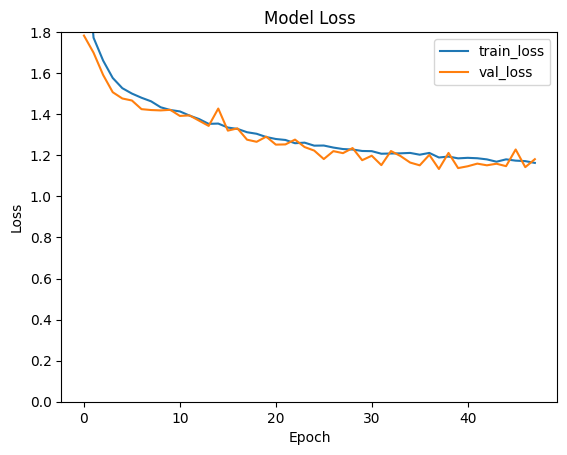

In [ ]:
# Pérdida durante el entrenamiento
loss = history.history['loss']


# Gráfica de la pérdida en función de las épocas
plt.plot(loss, label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1.8)
plt.legend(loc='upper right')
plt.show()

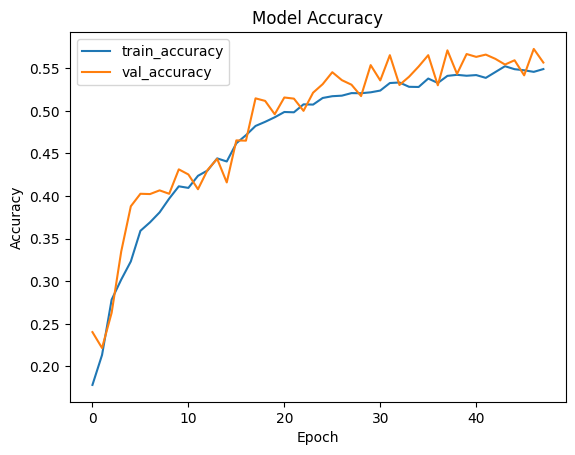

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']


# Graficar la precisión
plt.plot(accuracy_train, label='train_accuracy')
plt.plot(accuracy_val, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se puede observar las malas métricas que presenta la red con capas densas.

## Modelo con capas convolucionales y densas.

Arquitectura de la red

In [ ]:
# Función para construir el modelo

def build_model(input_shape, output_labels):
    i = Input(input_shape, dtype=tf.float32)

    x = Rescaling(1./255)(i)
    x = RandomFlip("horizontal")(x)
    x = RandomFlip("vertical")(x)
    x = RandomTranslation(0.1, 0.1, fill_mode="reflect")(x)
    x = RandomContrast(0.2)(x)

    x = Conv2D(8, (3, 3))(x)
    x = Activation("relu")(x)

    x = Conv2D(16, (3, 3))(x)
    x = Activation("relu")(x)

    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(32, (3, 3))(x)
    x = Activation("relu")(x)

    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3))(x)
    x = Activation("relu")(x)

    x = Conv2D(64, (3, 3))(x)
    x = Activation("relu")(x)

    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dropout(0.3)(x)
    x = Dense(output_labels)(x)
    x = Activation("softmax")(x)
    return tf.keras.Model(inputs=[i], outputs=[x])



Construimos el modelo

In [ ]:
#Construimos el modelo

print("Building model")
model_conv_dense = build_model((IMAGE_HEIGHT, IMAGE_WIDTH, 3), num_classes)

model_conv_dense.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

print('Correctly constructed model')

Building model
Correctly constructed model


In [ ]:
#Resumen del modelo

model_conv_dense.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_translation_1 (Rand  (None, 128, 128, 3)       0         
 omTranslation)                                                  
                                                                 
 random_contrast_1 (RandomC  (None, 128, 128, 3)       0         
 ontrast)                                                  

In [ ]:
#Buscamos el mejor modelo desminuyendo el loss de validacion
early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1, mode="min") # Frena cuando el val_loss deje de disminuir

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min"
)

# Número de épocas de entrenamiento
EPOCHS = 200


# Entrena el modelo
history = model_conv_dense.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/200
220/220 [==============================] - 17s 54ms/step - loss: 1.2300 - accuracy: 0.4935 - val_loss: 1.0216 - val_accuracy: 0.5877 - lr: 0.0010
Epoch 2/200
220/220 [==============================] - 11s 47ms/step - loss: 0.9587 - accuracy: 0.6239 - val_loss: 0.9069 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 3/200
220/220 [==============================] - 14s 60ms/step - loss: 0.8616 - accuracy: 0.6665 - val_loss: 0.8349 - val_accuracy: 0.6607 - lr: 0.0010
Epoch 4/200
220/220 [==============================] - 11s 50ms/step - loss: 0.7943 - accuracy: 0.6929 - val_loss: 0.8408 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 5/200
220/220 [==============================] - 11s 49ms/step - loss: 0.7547 - accuracy: 0.7165 - val_loss: 0.6367 - val_accuracy: 0.7797 - lr: 0.0010
Epoch 6/200
220/220 [==============================] - 11s 50ms/step - loss: 0.6933 - accuracy: 0.7398 - val_loss: 0.6135 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 7/200
220/220 [==============================]

Probamos el modelo

1/1 [==============================] - 0s 17ms/step


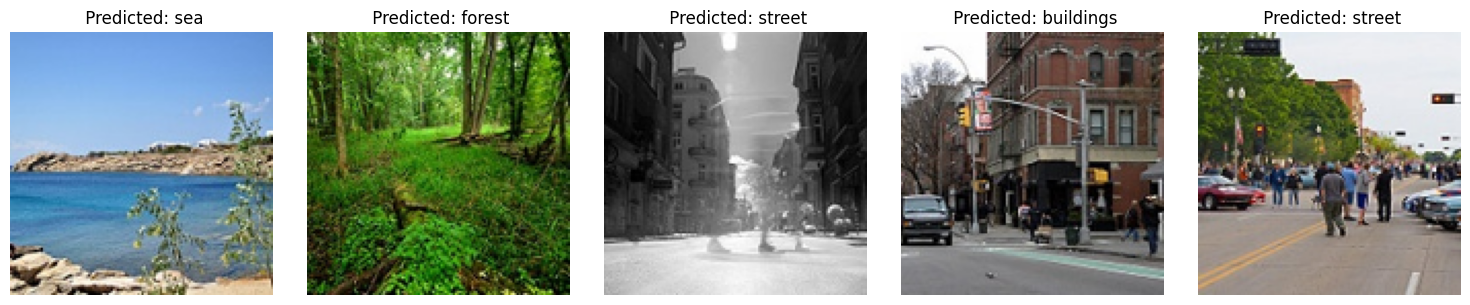

In [ ]:
predicted_model(DATA_DIRECTORY_PRED,model_conv_dense)

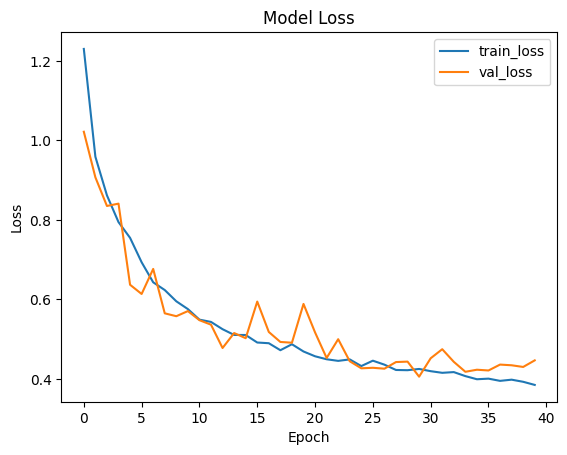

In [ ]:
# Pérdida durante el entrenamiento
loss = history.history['loss']


# Gráfica de la pérdida en función de las épocas
plt.plot(loss, label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

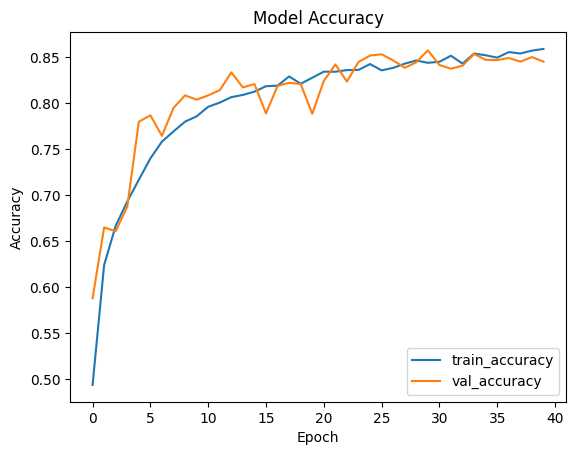

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']


# Graficar la precisión
plt.plot(accuracy_train, label='train_accuracy')
plt.plot(accuracy_val, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se puede notar, como a diferencia de la red con unicamente capas densas, la red en cuestión presenta métrica notoriamente superiores.

## Modelo que incluya bloques residuales identidad:


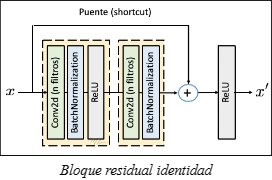

In [ ]:
def residual_block(x, filters, strides=1):
  shortcut = x

  # Capa convolucional 1
  x = Conv2D(filters, (3, 3), strides=strides, padding="same")(x)
  x = BatchNormalization()(x)  # Agrega BatchNormalization
  x = Activation("relu")(x)
  x = Dropout(0.1)(x)

  # Capa convolucional 2
  x = Conv2D(filters, (3, 3), padding="same")(x)
  x = BatchNormalization()(x)  # Agrega BatchNormalization

  # Ajusta el tamaño del shortcut si es necesario
  if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding="same")(shortcut)
    shortcut = BatchNormalization()(shortcut)  # Agrega BatchNormalization al shortcut

  # Suma la entrada al resultado de las capas convolucionales
  shortcut = Conv2D(filters, (1, 1))(shortcut)
  x = Add()([x, shortcut])
  x = Activation("relu")(x)
  return x


def build_model(input_shape, output_labels):
  i = Input(input_shape, dtype=tf.float32)
  x = Rescaling(1./255)(i)
  x = RandomFlip("horizontal")(x)
  x = RandomFlip("vertical")(x)
  x = RandomTranslation(0.1, 0.1, fill_mode="reflect")(x)
  x = RandomContrast(0.2)(x)

  # Bloque convolucional inicial
  x = Conv2D(8, (3, 3))(x)
  x = Activation("relu")(x)
  x = Dropout(0.3)(x)
  x = MaxPooling2D((2, 2))(x)

  # Bloques residuales
  x = residual_block(x, 16)
  x = MaxPooling2D((2, 2))(x)
  x = residual_block(x, 32)
  x = MaxPooling2D((2, 2))(x)
  x = residual_block(x, 64)
  x = MaxPooling2D((2, 2))(x)
  x = residual_block(x, 64)
  x = MaxPooling2D((2, 2))(x)
  x = residual_block(x, 128)
  x = MaxPooling2D((2, 2))(x)

  # Capa de salida
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = Dense(output_labels)(x)
  x = Activation("softmax")(x)

  return tf.keras.Model(inputs=[i], outputs=[x])

In [ ]:
print("Building model")
model_resnet = build_model((IMAGE_HEIGHT, IMAGE_WIDTH, 3), num_classes)

model_resnet.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

print('Correctly constructed model')

Building model
Correctly constructed model


In [ ]:
#Resumen del modelo
model_resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 128, 128, 3)          0         ['input_8[0][0]']             
                                                                                                  
 random_flip_4 (RandomFlip)  (None, 128, 128, 3)          0         ['rescaling_2[0][0]']         
                                                                                                  
 random_flip_5 (RandomFlip)  (None, 128, 128, 3)          0         ['random_flip_4[0][0]']       
                                                                                            

In [ ]:
#Buscamos el mejor modelo desminuyendo el loss de validacion
early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1, mode="min")

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min"
)

# Número de épocas de entrenamiento
EPOCHS = 200

# Entrena el modelo
history = model_resnet.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/200
220/220 [==============================] - 29s 72ms/step - loss: 1.1715 - accuracy: 0.5488 - val_loss: 2.2718 - val_accuracy: 0.3143 - lr: 0.0010
Epoch 2/200
220/220 [==============================] - 14s 63ms/step - loss: 0.8234 - accuracy: 0.6866 - val_loss: 1.2075 - val_accuracy: 0.5190 - lr: 0.0010
Epoch 3/200
220/220 [==============================] - 14s 64ms/step - loss: 0.7243 - accuracy: 0.7304 - val_loss: 1.0415 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 4/200
220/220 [==============================] - 15s 65ms/step - loss: 0.6372 - accuracy: 0.7629 - val_loss: 0.9164 - val_accuracy: 0.6527 - lr: 0.0010
Epoch 5/200
220/220 [==============================] - 14s 63ms/step - loss: 0.5920 - accuracy: 0.7797 - val_loss: 0.5747 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 6/200
220/220 [==============================] - 14s 62ms/step - loss: 0.5571 - accuracy: 0.7921 - val_loss: 1.4655 - val_accuracy: 0.5530 - lr: 0.0010
Epoch 7/200
220/220 [==============================]

1/1 [==============================] - 0s 18ms/step


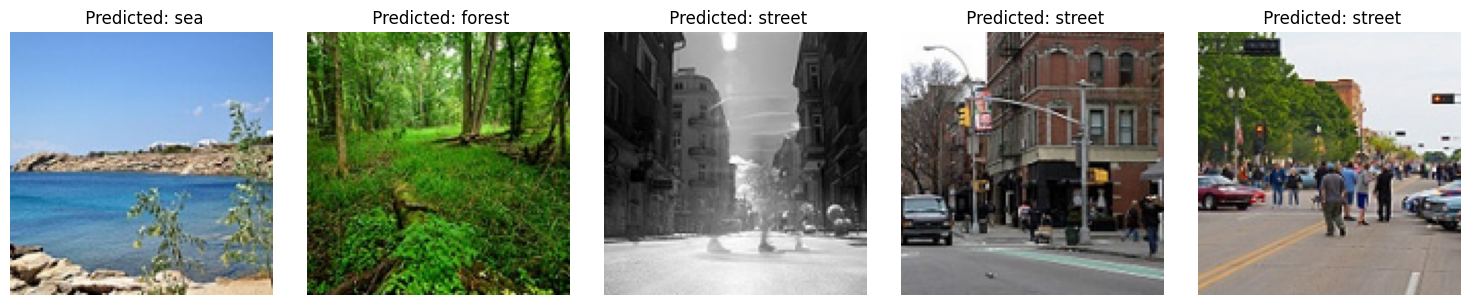

In [ ]:
predicted_model(DATA_DIRECTORY_PRED,model_resnet)

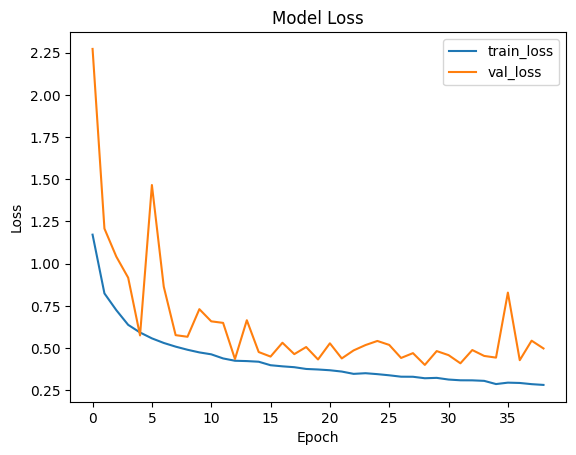

In [ ]:
# Pérdida durante el entrenamiento
loss = history.history['loss']


# Gráfica de la pérdida en función de las épocas
plt.plot(loss, label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

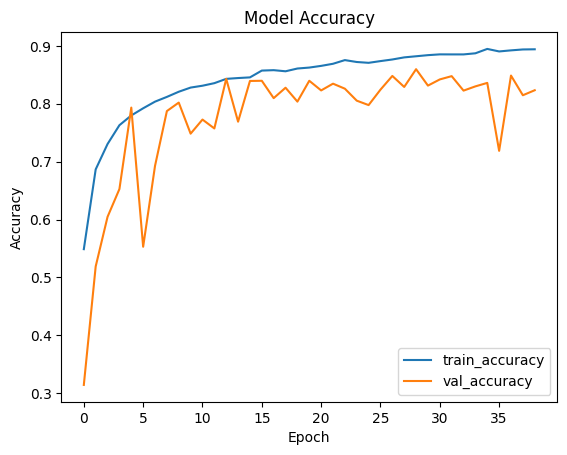

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']


# Graficar la precisión
plt.plot(accuracy_train, label='train_accuracy')
plt.plot(accuracy_val, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

En esta red tenemos 11 capas convolucionales y podemos notar buenas metricas debido a la implementacion de los bloques residuales.

## Modelo que utilice como backbone alguna de las arquitecturas disponibles en TensorFlow (transfer learning): https://www.tensorflow.org/api_docs/python/tf/keras/applications


Arquitectura de la red

In [23]:
def build_model(input_shape, num_classes):

    base_model = tf.keras.applications.EfficientNetV2B0(input_shape=input_shape,
                                                include_top=False,
                                                weights='imagenet')
    base_model.trainable = False



    i = Input(shape=input_shape)
    x = base_model(i, training=False)
    x = GlobalMaxPooling2D()(x)
    x = Dropout(0.5)(x)  #Agregamos Dropout para reducir el overfiting
    x = Dense(num_classes, activation='softmax')(x)

    return tf.keras.Model(i, x)

Construimos el modelo

In [24]:
print("Building model")
model_tranf = build_model((IMAGE_HEIGHT, IMAGE_WIDTH, 3), num_classes)

model_tranf.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

print('Correctly constructed model')

Building model
Correctly constructed model


In [25]:
#Resumen del modelo
model_tranf.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 4, 4, 1280)        5919312   
 nal)                                                            
                                                                 
 global_max_pooling2d_2 (Gl  (None, 1280)              0         
 obalMaxPooling2D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 5926998 (22.61 MB)
Trainable params: 7686 (30

In [26]:
#Entrenamos el modelo
early_stopping = EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1, mode="min")

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=5, verbose=1, min_delta=1e-4, mode="min"
)

# Número de épocas de entrenamiento
EPOCHS = 200

# Entrena el modelo
history = model_tranf.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/200
220/220 [==============================] - 23s 67ms/step - loss: 0.8264 - accuracy: 0.7659 - val_loss: 0.3386 - val_accuracy: 0.8870 - lr: 0.0010
Epoch 2/200
220/220 [==============================] - 13s 59ms/step - loss: 0.4369 - accuracy: 0.8611 - val_loss: 0.3132 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 3/200
220/220 [==============================] - 13s 60ms/step - loss: 0.3793 - accuracy: 0.8814 - val_loss: 0.3034 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 4/200
220/220 [==============================] - 15s 69ms/step - loss: 0.3385 - accuracy: 0.8846 - val_loss: 0.2809 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 5/200
220/220 [==============================] - 16s 71ms/step - loss: 0.3288 - accuracy: 0.8876 - val_loss: 0.2950 - val_accuracy: 0.9037 - lr: 0.0010
Epoch 6/200
220/220 [==============================] - 13s 59ms/step - loss: 0.3140 - accuracy: 0.8906 - val_loss: 0.2820 - val_accuracy: 0.9060 - lr: 0.0010
Epoch 7/200
220/220 [==============================]

Probamos el modelo

1/1 [==============================] - 0s 52ms/step


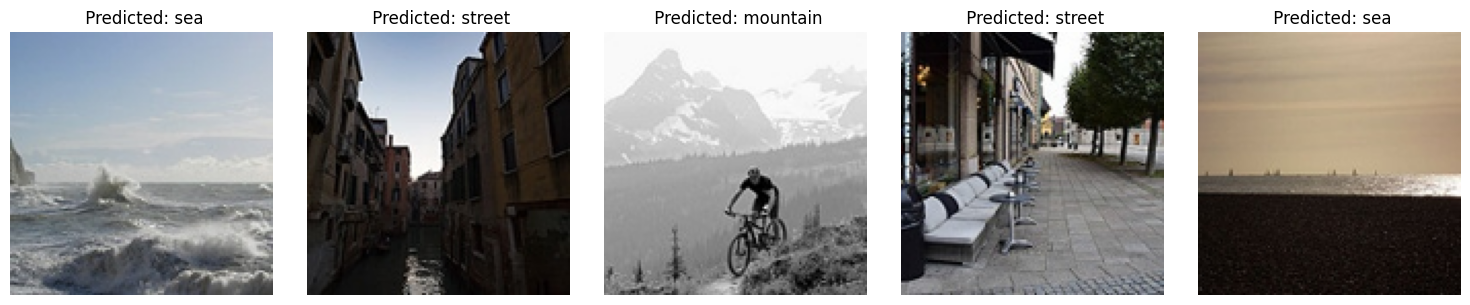

In [27]:
predicted_model(DATA_DIRECTORY_PRED,model_tranf)

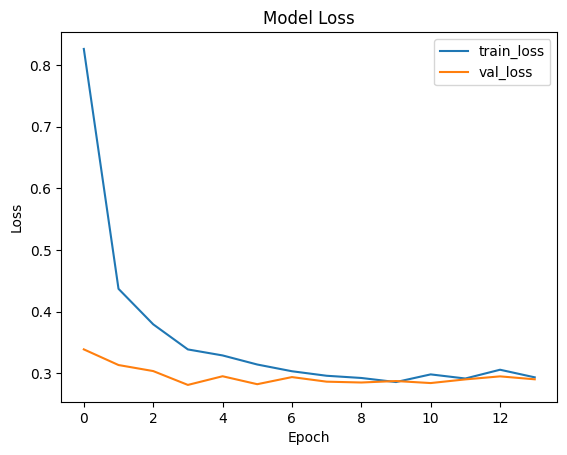

In [28]:
# Pérdida durante el entrenamiento
loss = history.history['loss']


# Gráfica de la pérdida en función de las épocas
plt.plot(loss, label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

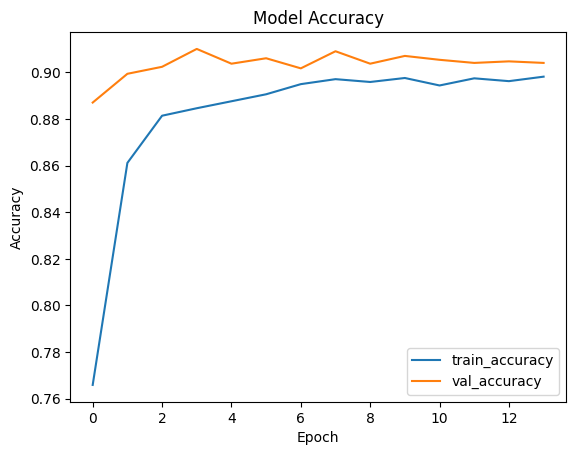

In [29]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']


# Graficar la precisión
plt.plot(accuracy_train, label='train_accuracy')
plt.plot(accuracy_val, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tanto en el conjunto de entrenamiento como en el de validación, el loss disminuye de forma consistente a lo largo de las épocas, y se puede notar un buen numero ya desde las primeras epocas.

Se puede notar la mejora de la accuracy a lo largo de las épocas. Y una correlacion entre train y test que deja ver que el modelo no overfitea.

# Conclusión final

A lo largo de los tres problemas, quedó en evidencia cómo las diferentes arquitecturas de redes neuronales se adaptan de manera distinta a cada situación y tipo de datos.

**Problema 1 (Predicción lineal)**:

La red neuronal densa fue efectiva para predecir la variable lineal del rendimiento académico. El dataset pequeño y la cantidad limitada de variables permitieron un buen rendimiento con una arquitectura simple, sin necesidad de complejidades adicionales.

**Problema 2 (Clasificación)**:

Similar al problema 1, el tamaño del dataset y la naturaleza de las variables (17 en total) llevaron a utilizar un modelo un poco más grande que en el problema 1, pero aún manejable. Se agregaron capas de dropout para evitar el sobreajuste.

**Problema 3 (Clasificación de imágenes)**:

Este problema permitió comparar directamente diferentes modelos en una tarea de clasificación de imágenes:


*   **Capas densas**: Mostraron un rendimiento deficiente, incluso variando su arquitectura.
*   **Capas convolucionales y densas**: Ofrecieron un rendimiento óptimo, especialmente con la arquitectura mostrada por la cátedra, demostrando la importancia de las capas convolucionales para procesar información espacial en imágenes.
*   **Bloques residuales**: También obtuvieron un buen rendimiento, destacando su utilidad en redes más profundas.
*  **Transfer learning**: El rendimiento varió según el modelo pre-entrenado,  resaltando la importancia de seleccionar la arquitectura base adecuada. Es por ello, que decidimos quedarnos con **EfficientNetV2B0**.


####**Conclusiones generales:**
La elección de la estructura de la red neuronal depende del tipo de datos y del problema. Redes densas pueden ser suficientes para datasets pequeños con pocas variables, mientras que las redes convolucionales son ideales para imágenes.
En base a lo trabajado, consideramos que la experimentación es clave para encontrar la mejor arquitectura.
Hemos visto que técnicas como dropout y bloques residuales ayudan a prevenir el sobreajuste y a entrenar redes más profundas.
